# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

План работы:
1. Открыть файл с данными:
- изучить общую информацию о полученном датафрейме,
- построить гистограмму для всех числовых столбцов таблицы на одном графике. 
2. Предобработка данных
- найти и изучить пропущенные значения в столбцах: определить, в каких столбцах есть пропуски,
- заполнить пропущенные значения там, где это возможно (В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных),
- рассмотрите типы данных в каждом столбце:
    - найти столбцы, в которых нужно изменить тип данных,
    - преобразовать тип данных в выбранных столбцах (в ячейке с типом markdown поясните, почему нужно изменить тип данных),
    - изучить уникальные значения в столбце с названиями и устраните неявные дубликаты.
3. Добавить в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра,
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее),
- месяц публикации объявления,
- год публикации объявления,
- тип этажа квартиры (значения — «первый», «последний», «другой»),
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
4. Провести исследовательский анализ данных:
- изучить перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их,
- изучить, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление,
- какие факторы больше всего влияют на общую (полную) стоимость объекта?
- построить графики, которые покажут зависимость цены от параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
- посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- вычислите среднюю цену каждого километра, опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.
5. Напишите общий вывод
- написать полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Общая информация по таблице. Описание данных

Итак, в таблице 22 столбца с типами данных bool(2), float64(14), int64(3), object(3). <br> Строк в таблице 23699. <br> Согласно документаци к данным: <br>  airports_nearest — расстояние до ближайшего аэропорта в метрах (м) <br> balcony — число балконов <br> ceiling_height — высота потолков (м) <br> cityCenters_nearest — расстояние до центра города (м) <br> days_exposition — сколько дней было размещено объявление (от публикации до снятия) <br> first_day_exposition — дата публикации <br> floor — этаж <br> floors_total — всего этажей в доме <br> is_apartment — апартаменты (булев тип) <br> kitchen_area — площадь кухни в квадратных метрах (м²) <br> 	last_price — цена на момент снятия с публикации <br> living_area — жилая площадь в квадратных метрах (м²) <br> locality_name — название населённого пункта <br> open_plan — свободная планировка (булев тип) <br> parks_around3000 — число парков в радиусе 3 км <br> parks_nearest — расстояние до ближайшего парка (м) <br> ponds_around3000 — число водоёмов в радиусе 3 км <br>	ponds_nearest — расстояние до ближайшего водоёма (м) <br> rooms — число комнат <br> studio — квартира-студия (булев тип) <br> total_area — общая площадь квартиры в квадратных метрах (м²) <br> total_images — число фотографий квартиры в объявлении <br> <br> Количество значений в столбцах различается. Это означает, что в таблице есть пропуски (в 14 из 22 столбцов).
 

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Числовые характеристики и гистограммы

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


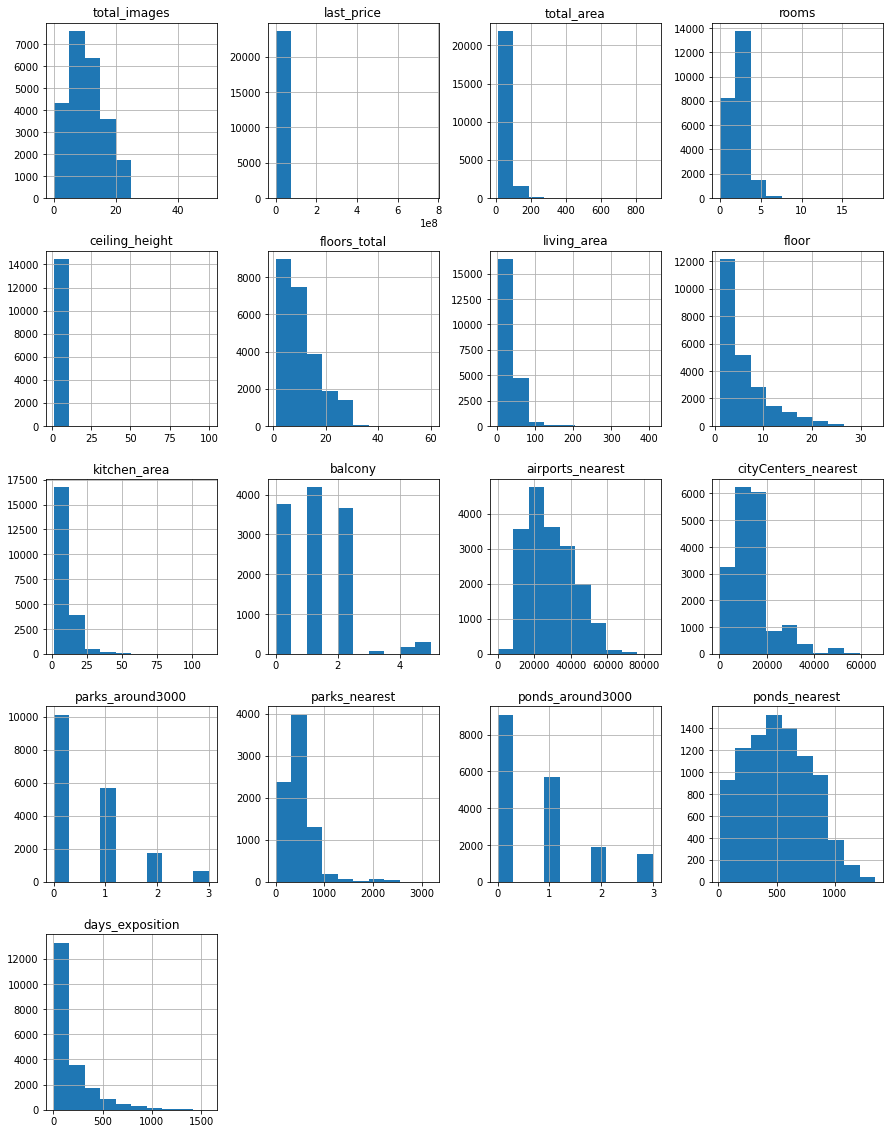

In [6]:
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### Наличие дубликатов:

In [7]:
data.duplicated().sum()

0

#### Пропущенные значения

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Посмотрим оставшиеся пропуски в процентном соотношении:**

In [9]:
for col in data.columns:
    no_value = data[col].isna().mean()
    if no_value > 0:
        print(col, int(no_value * 100), data[col].dtype, sep='.....')

ceiling_height.....38.....float64
floors_total.....0.....float64
living_area.....8.....float64
is_apartment.....88.....object
kitchen_area.....9.....float64
balcony.....48.....float64
locality_name.....0.....object
airports_nearest.....23.....float64
cityCenters_nearest.....23.....float64
parks_around3000.....23.....float64
parks_nearest.....65.....float64
ponds_around3000.....23.....float64
ponds_nearest.....61.....float64
days_exposition.....13.....float64


Удаляем строки с незначительным количеством пропусков, в 'locality_name' и 'floors_total' их меньше 1. К тому же строки без наименования населенного пункта нельзя применить для анализа.


In [10]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [11]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

#### Столбец 'balcony', 'parks_around_3000', 'ponds_around_3000'

<br>- Столбец 'balcony' (число балконов) - 11519 пропусков <br> Число балконов пропущено, следовательно, можно предроложить, что их нет, и заменить пропуски на 0 (ноль) <br>  - Аналогично, в столбце 'parks_around_3000' (число парков в радиусе 3000) и в столбце 'ponds_around_3000' (число водоемов в радиусе 3000) -  по 5518 пропусков в каждом <br> - Число парков и водоемов пропущено, но можно предроложить, что их нет, и заменить пропуски на 0(ноль) 

In [12]:
for column in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[column] = data[column].fillna(0)

In [13]:
print(data['balcony'].isna().sum())
print(data['parks_around3000'].isna().sum())
print(data['ponds_around3000'].isna().sum())

0
0
0


#### Наименования столбцов:

In [14]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Исправляем название колонки, в которой есть расхождение с хорошим стилем:

In [15]:
data = data.rename(
    columns={'cityCenters_nearest': 'city_centers_nearest', 
             'parks_around3000': 'parks_around_3000', 
             'ponds_around3000': 'ponds_around_3000'}
)

In [16]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Смена типа данных

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [18]:
data['first_day_exposition'].head(2)

0   2019-03-07
1   2018-12-04
Name: first_day_exposition, dtype: datetime64[ns]

In [19]:
data['last_price'] = data['last_price'].astype('int64')

In [20]:
data['floors_total'] = data['floors_total'].astype('int64')


In [21]:
data['balcony'] = data['balcony'].astype('int64')

In [22]:
data['days_exposition'] = np.ceil(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

#### Пропущеные значения по столбцам:

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [24]:
for col in data.columns:
    no_value = data[col].isna().mean()
    if no_value > 0:
        print(col, int(no_value * 100), data[col].dtype, sep='.....')

ceiling_height.....38.....float64
living_area.....7.....float64
is_apartment.....88.....object
kitchen_area.....9.....float64
airports_nearest.....23.....float64
city_centers_nearest.....23.....float64
parks_nearest.....65.....float64
ponds_nearest.....61.....float64
days_exposition.....13.....Int64


##### Столбец 'is_apartment' (апартаменты)

In [25]:
print('Количество пропущенных значений:', data['is_apartment'].isna().sum())
print('Уникальные значения:', data['is_apartment'].unique())

Количество пропущенных значений: 20805
Уникальные значения: [nan False True]


Количество пропусков в стобце 'is_apartment' слишком велико (20805) - 88%. Так как в нашем распоряжении все-таки архив объявлений о продаже квартир, а не нежилых помещений, заменим эти пропуски на значение False

In [26]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

In [27]:
print('Количество пропущенных значений:', data['is_apartment'].isna().sum())
print('Уникальные значения:', data['is_apartment'].unique())

Количество пропущенных значений: 0
Уникальные значения: [False  True]


##### Cтолбец 'locality_name' (Название населенного пунката): 

Выведем по возрастанию уникальные названия и количество строк:

In [28]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [29]:
len(data['locality_name'].unique())

364

Заменяем в столбце все "ё" на "е" и "городской поселок" на "поселок городского типа":

In [30]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [31]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [32]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [33]:
len(data['locality_name'].unique())

323

Некоторые населенные пункты совпадают по названию. Но, проверив по карте, можно выяснить, что это разные населенные пункты: например: Любань (подразумевается город) и поселок Любань, поселок Рябово и поселек городского типа Рябово. Оставляем далее без изменений.

In [34]:
data.duplicated().sum()

0

In [35]:
data['locality_name'].isna().sum()

0

##### Столбец floors_total (всего этажей в доме)

Количество пропущенных значений: 0

Уникальные значения: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 33 34 35 36 37 52 60]

Описательная статистика: count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64



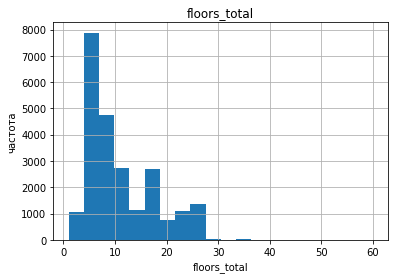

In [36]:
print('Количество пропущенных значений:', data['floors_total'].isna().sum())
print()
print('Уникальные значения:', data['floors_total'].sort_values().unique())
print()
print('Описательная статистика:',data['floors_total'].describe())
print()
data['floors_total'].hist(bins=20)
plt.title('floors_total')
plt.xlabel('floors_total')
plt.ylabel('частота')
plt.show()

Нулевых значений нет, аномально больших значений нет. 

Пропуски отсутствуют.

##### Столбец "ceiling_height" - высота потолков (м)

Количество пропущенных значений: 9084

Уникальные значения: [  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   

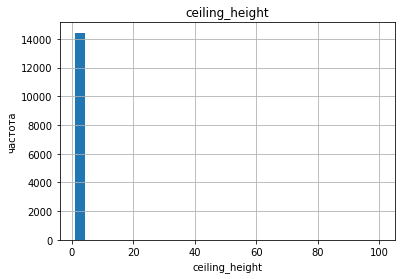

In [37]:
print('Количество пропущенных значений:', data['ceiling_height'].isna().sum())
print()
print('Уникальные значения:', data['ceiling_height'].sort_values().unique())
print()
print('Описательная статистика:',data['ceiling_height'].describe())
print()
data['ceiling_height'].hist(bins=30)
plt.title('ceiling_height')
plt.xlabel('ceiling_height')
plt.ylabel('частота')
plt.show()

In [38]:
len(data.loc[data['ceiling_height'] >= 10])

25

У нас 25 строк, где высота потолков больше 10 м. Это аномальное значение, возможно была пропущена запятая. Разделим данные на 10

In [39]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height'] / 10

In [40]:
len(data.loc[data['ceiling_height'] >= 10])

1

In [41]:
# кличество строк, где высота меньше 2,3
len(data.loc[data['ceiling_height'] < 2.3])

20

Высота потолков по стандарту 2,5 м. Предположим, что полы - потолки при отделке забирают см, то удалим из данных строки, где высота 2,3 м - это 19
строк. 

In [42]:
data.drop(index=data.query('ceiling_height < 2.3').index,inplace=True)
data.drop(index=data.query('ceiling_height >= 10').index,inplace=True)

In [43]:
# проверяем кличество строк, где высота меньше 2,3 и больше 10 м
len(data.loc[data['ceiling_height'] < 2.3])
len(data.loc[data['ceiling_height'] >= 10])

0

Количество пропущенных значений: 9084

Уникальные значения: [2.3  2.34 2.4  2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53 2.54 2.55
 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67 2.68 2.69
 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81 2.82 2.83
 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95 2.96 2.97
 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11
 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2  3.21 3.22 3.23 3.24 3.25 3.26
 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4
 3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5  3.51 3.52 3.53 3.54 3.55
 3.56 3.57 3.58 3.59 3.6  3.62 3.63 3.65 3.66 3.67 3.68 3.69 3.7  3.75
 3.76 3.78 3.8  3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.9  3.93 3.95 3.98
 4.   4.06 4.1  4.14 4.15 4.19 4.2  4.25 4.3  4.37 4.4  4.45 4.5  4.65
 4.7  4.8  4.9  5.   5.2  5.3  5.5  5.6  5.8  6.   8.   8.3   nan]

Описательная статистика: count    14460.000000
mean         2.728520
std          0.291674
m

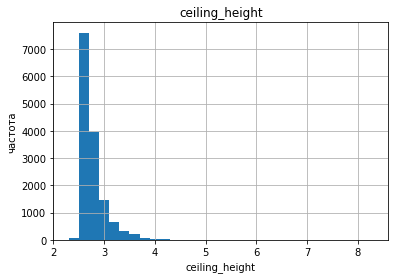

In [44]:
print('Количество пропущенных значений:', data['ceiling_height'].isna().sum())
print()
print('Уникальные значения:', data['ceiling_height'].sort_values().unique())
print()
print('Описательная статистика:',data['ceiling_height'].describe())
print()
data['ceiling_height'].hist(bins=30)
plt.title('ceiling_height')
plt.xlabel('ceiling_height')
plt.ylabel('частота')
plt.show()

In [45]:
# заменим пропущенные значения медианой по населенному пункту и этажности здания
data.groupby(['locality_name', 'floors_total'])['ceiling_height'].median()

locality_name         floors_total
Бокситогорск          3               5.000
                      4               2.800
                      5                 NaN
Волосово              1                 NaN
                      2                 NaN
                                      ...  
село Русско-Высоцкое  5               2.600
                      10              2.575
село Старая Ладога    2                 NaN
                      3                 NaN
село Шум              2                 NaN
Name: ceiling_height, Length: 1054, dtype: float64

In [46]:
data['ceiling_height'] = data['ceiling_height'].fillna(
    data.groupby(['locality_name', 'floors_total'])['ceiling_height'].transform('median')
)

In [47]:
print('Количество пропущенных значений:', data['ceiling_height'].isna().sum())

Количество пропущенных значений: 344


В некоторых населенных пунктах остались пропуски и вообще нет данных по этажности, так что заменим эти данные общим медианным значением.

In [48]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Количество пропущенных значений: 0

Уникальные значения: [2.3   2.34  2.4   2.45  2.46  2.47  2.48  2.49  2.5   2.51  2.52  2.525
 2.53  2.54  2.55  2.555 2.56  2.565 2.57  2.575 2.58  2.59  2.6   2.61
 2.615 2.62  2.625 2.63  2.64  2.645 2.65  2.65  2.66  2.67  2.675 2.68
 2.69  2.7   2.71  2.715 2.72  2.725 2.73  2.735 2.74  2.745 2.75  2.76
 2.77  2.775 2.775 2.78  2.785 2.79  2.8   2.81  2.82  2.83  2.84  2.85
 2.86  2.87  2.88  2.89  2.9   2.91  2.92  2.93  2.94  2.95  2.96  2.97
 2.98  2.99  3.    3.01  3.02  3.03  3.04  3.05  3.06  3.07  3.08  3.09
 3.1   3.11  3.12  3.13  3.14  3.15  3.16  3.17  3.18  3.2   3.21  3.22
 3.23  3.24  3.25  3.26  3.27  3.28  3.29  3.3   3.31  3.32  3.325 3.33
 3.34  3.35  3.36  3.37  3.38  3.39  3.4   3.42  3.43  3.44  3.45  3.46
 3.47  3.48  3.49  3.5   3.51  3.52  3.53  3.54  3.55  3.56  3.57  3.58
 3.59  3.6   3.62  3.63  3.65  3.66  3.67  3.68  3.69  3.7   3.75  3.76
 3.78  3.8   3.82  3.83  3.84  3.85  3.86  3.87  3.88  3.9   3.93  3.95
 3.98 

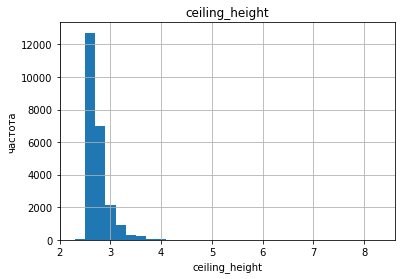

In [49]:
print('Количество пропущенных значений:', data['ceiling_height'].isna().sum())
print()
print('Уникальные значения:', data['ceiling_height'].sort_values().unique())
print()
print('Описательная статистика:',data['ceiling_height'].describe())
print()
data['ceiling_height'].hist(bins=30)
plt.title('ceiling_height')
plt.xlabel('ceiling_height')
plt.ylabel('частота')
plt.show()

Все пропуски заполнены медианными значениями в зависимости от начеленного пункта и этажности дома. Удалены данные, где высота потолков меньше 2,3 м как аномальные. Исправлена предполагаемая ошибка - в высоте больше 10 м добавлена запятая. Средняя высота и медиана соответсвуют действительности.


##### Столбец 'living_area' (жилая площадь, м2)

Количество пропущенных значений: 1863

Уникальные значения: [  2.    3.    5.  ... 409.  409.7   nan]

Описательная статистика: count    21681.000000
mean        34.459985
std         22.050127
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64



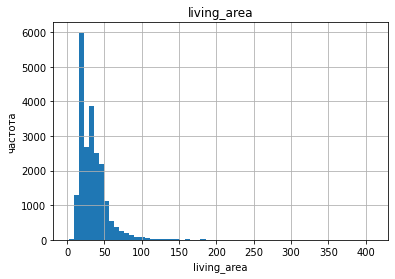

In [50]:
print('Количество пропущенных значений:', data['living_area'].isna().sum())
print()
print('Уникальные значения:', data['living_area'].sort_values().unique())
print()
print('Описательная статистика:',data['living_area'].describe())
print()
data['living_area'].hist(bins=60)
plt.title('living_area')
plt.xlabel('living_area')
plt.ylabel('частота')
plt.show()

Аномальные значения - до 10 м2. Больше 250 м2 - редкость (возможно, какая-то отдельная категория недвижимости)

In [51]:
print(len(data.loc[data['living_area'] <= 10]))
print(len(data.loc[data['living_area'] >= 250]))

56
19


Удалим аномальные значения: жилую площадь менее 10 м2 и более 250 м2

In [52]:
data.drop(index=data.query('living_area <= 10').index,inplace=True)

In [53]:
data.drop(index=data.query('living_area >= 250').index,inplace=True)

In [54]:
print('Количество пропущенных значений:', data['living_area'].isna().sum())
print('Уникальные значения:', data['living_area'].sort_values().unique())
print('Описательная статистика:',data['living_area'].describe())

Количество пропущенных значений: 1863
Уникальные значения: [ 10.08  10.3   10.4  ... 248.5  248.7     nan]
Описательная статистика: count    21606.000000
mean        34.298701
std         20.614559
min         10.080000
25%         18.700000
50%         30.000000
75%         42.300000
max        248.700000
Name: living_area, dtype: float64


Количество пропусков осталось 1863. На описательную статистику удаление сильно не повлияло. Заменим пропущенные значения медианой в зависимости от населенного пункта, общей площади, количества комнат и вида (студия)

In [55]:
display(data.groupby(['locality_name', 'total_area', 'studio', 'rooms'])['living_area'].agg('median'))

locality_name         total_area  studio  rooms
Бокситогорск          29.0        False   1         NaN
                      32.0        False   1        17.0
                      36.0        False   1        19.0
                      41.0        False   2        28.0
                      42.0        False   2         NaN
                                                   ... 
село Русско-Высоцкое  58.6        False   2        31.7
                      58.8        False   3        37.9
село Старая Ладога    30.0        False   1        15.8
                      55.0        False   2         NaN
село Шум              59.0        False   3        42.3
Name: living_area, Length: 8910, dtype: float64

In [56]:
data['living_area'] = data['living_area'].fillna(
    data.groupby(['locality_name', 'total_area', 'studio', 'rooms'])['living_area'].transform('median')
)

In [57]:
print('Количество пропущенных значений:', data['living_area'].isna().sum())

Количество пропущенных значений: 674


Оставшиеся пропуки заменим общей медианой по жилой площади

In [58]:
data['living_area'] = data['living_area'].fillna(30)

Количество пропущенных значений: 0

Уникальные значения: [ 10.08  10.3   10.4  ... 239.4  248.5  248.7 ]

Описательная статистика: count    23469.000000
mean        34.102406
std         20.183192
min         10.080000
25%         18.900000
50%         30.000000
75%         42.000000
max        248.700000
Name: living_area, dtype: float64



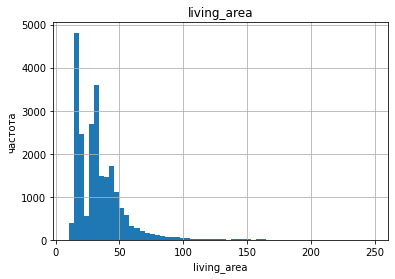

In [59]:
print('Количество пропущенных значений:', data['living_area'].isna().sum())
print()
print('Уникальные значения:', data['living_area'].sort_values().unique())
print()
print('Описательная статистика:',data['living_area'].describe())
print()
data['living_area'].hist(bins=60)
plt.title('living_area')
plt.xlabel('living_area')
plt.ylabel('частота')
plt.show()

##### Столбец  kitchen_area (площадь кухни, м2)

Количество пропущенных значений: 2204

Уникальные значения: [  1.3    2.     2.3    2.4    2.89   3.     3.2    3.3    3.4    3.5
   3.7    3.8    4.     4.1    4.2    4.3    4.4    4.5    4.6    4.7
   4.8    4.9    5.     5.04   5.06   5.1    5.14   5.2    5.21   5.23
   5.25   5.28   5.29   5.3    5.31   5.33   5.35   5.4    5.42   5.44
   5.47   5.49   5.5    5.53   5.59   5.6    5.61   5.62   5.64   5.65
   5.68   5.7    5.74   5.75   5.78   5.8    5.82   5.85   5.86   5.9
   5.91   6.     6.02   6.03   6.1    6.16   6.19   6.2    6.22   6.23
   6.24   6.25   6.26   6.27   6.28   6.3    6.31   6.33   6.35   6.36
   6.37   6.4    6.47   6.5    6.55   6.58   6.6    6.61   6.62   6.65
   6.7    6.72   6.73   6.76   6.77   6.8    6.82   6.83   6.84   6.86
   6.9    6.91   6.93   6.95   7.     7.02   7.03   7.06   7.09   7.1
   7.12   7.15   7.17   7.18   7.19   7.2    7.3    7.36   7.4    7.41
   7.48   7.5    7.54   7.6    7.63   7.65   7.7    7.71   7.78   7.8
   7.84   7.85   7.86 

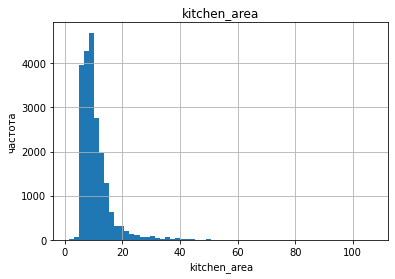

In [60]:
print('Количество пропущенных значений:', data['kitchen_area'].isna().sum())
print()
print('Уникальные значения:', data['kitchen_area'].sort_values().unique())
print()
print('Описательная статистика:',data['kitchen_area'].describe())
print()
data['kitchen_area'].hist(bins=60)
plt.title('kitchen_area')
plt.xlabel('kitchen_area')
plt.ylabel('частота')
plt.show()

In [61]:
data[data['rooms'] == 0] = data[data['rooms'] == 0].fillna(0)

In [62]:
print('Количество пропущенных значений:', data['kitchen_area'].isna().sum())

Количество пропущенных значений: 2013


Оставшиеся пропуски заполним медианой по локации, общей площади и количеству комнат

In [63]:
data['kitchen_area'] = data['kitchen_area'].fillna(
    data.groupby(['locality_name', 'total_area', 'rooms'])['kitchen_area'].transform('median')
)

In [64]:
data['kitchen_area'].isna().sum()

687

In [65]:
data['kitchen_area'] = data['kitchen_area'].fillna(
    data.groupby('rooms')['kitchen_area'].transform('median')
)

In [66]:
data['kitchen_area'].isna().sum()

0

Количество пропущенных значений: 0

Уникальные значения: [  0.    1.3   2.  ...  93.2 100.7 107. ]

Описательная статистика: count    23469.000000
mean        10.372354
std          5.664469
min          0.000000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64



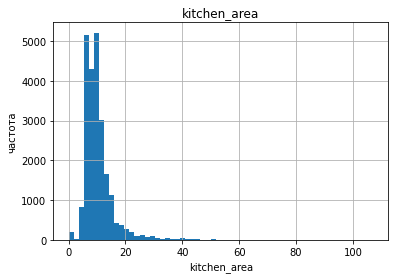

In [67]:
print('Количество пропущенных значений:', data['kitchen_area'].isna().sum())
print()
print('Уникальные значения:', data['kitchen_area'].sort_values().unique())
print()
print('Описательная статистика:',data['kitchen_area'].describe())
print()
data['kitchen_area'].hist(bins=60)
plt.title('kitchen_area')
plt.xlabel('kitchen_area')
plt.ylabel('частота')
plt.show()

In [68]:
# проверяем оставшиеся пропучки в данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5424
city_centers_nearest     5403
parks_around_3000           0
parks_nearest           15323
ponds_around_3000           0
ponds_nearest           14356
days_exposition          3143
dtype: int64

##### Столбец days_exposition и first_day_exposition (сколько дней  было размещено объявление и дата публикации)

Количество пропущенных значений: 3143

Уникальные значения: <IntegerArray>
[   0,    1,    2,    4,    5,    7,    8,    9,   10,   12,
 ...
 1485, 1486, 1490, 1498, 1513, 1514, 1554, 1572, 1580, <NA>]
Length: 1132, dtype: Int64

Описательная статистика: count    20326.000000
mean       180.871347
std        219.763989
min          0.000000
25%         46.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64



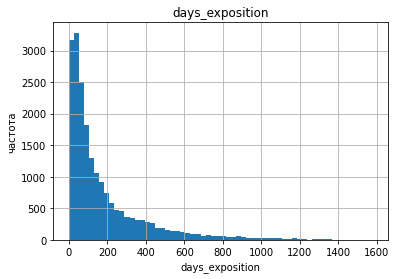

In [69]:
# рассмотрим сначала, сколько дней было размещено объявление

print('Количество пропущенных значений:', data['days_exposition'].isna().sum())
print()
print('Уникальные значения:', data['days_exposition'].sort_values().unique())
print()
print('Описательная статистика:',data['days_exposition'].describe())
print()
data['days_exposition'].hist(bins=60)
plt.title('days_exposition')
plt.xlabel('days_exposition')
plt.ylabel('частота')
plt.show()

In [70]:
data.query('days_exposition > 365*3')['days_exposition'].count()

164

Минимальный срок размещения - 1 день, неопубликованных объявлений нет. Максимальное значение 1580 дней (более 4 лет), но это не аномальное значение, квартира может продаваться любое количество времени.

Количество пропущенных значений: 0



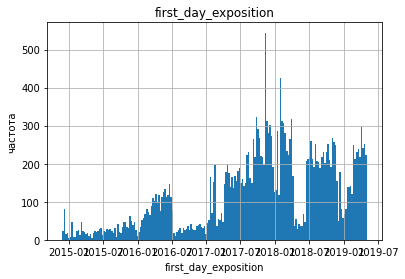

In [71]:
# рассмотрим дату публикации

print('Количество пропущенных значений:', data['first_day_exposition'].isna().sum())
print()
data['first_day_exposition'].hist(bins=200)
plt.title('first_day_exposition')
plt.xlabel('first_day_exposition')
plt.ylabel('частота')
plt.show()

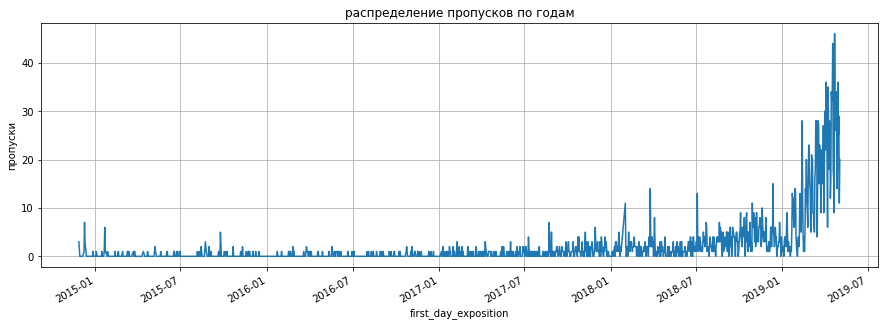

In [72]:
# распределение пропусков по годам
data.groupby('first_day_exposition')['days_exposition'].apply(lambda _data: _data.isna().sum()).plot(
    grid=True, figsize=(15, 5)                                          )
plt.title('распределение пропусков по годам')
plt.xlabel('first_day_exposition')
plt.ylabel('пропуски')
plt.show()


Пропуски в столбце days_exposition (количество дней) сосредоточены в основном в последних годах, и что бы не потерять актуальные данные удалять их не будем.

##### Столбец airports_nearest (расстояние до ближайшего аэропорта, м)

Количество пропущенных значений: 5424

Уникальные значения: [    0.  6450.  6914. ... 84853. 84869.    nan]

Описательная статистика: count    18045.000000
mean     28668.920421
std      12749.947169
min          0.000000
25%      18475.000000
50%      26662.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64



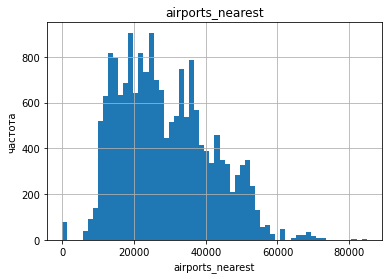

In [73]:
print('Количество пропущенных значений:', data['airports_nearest'].isna().sum())
print()
print('Уникальные значения:', data['airports_nearest'].sort_values().unique())
print()
print('Описательная статистика:',data['airports_nearest'].describe())
print()
data['airports_nearest'].hist(bins=60)
plt.title('airports_nearest')
plt.xlabel('airports_nearest')
plt.ylabel('частота')
plt.show()

In [74]:
airports_nearest_group = data.groupby('locality_name').agg({'airports_nearest': ['min', 'max']})
display(airports_nearest_group)

airports_nearest     
                                  min  max
locality_name                             
Бокситогорск                      NaN  NaN
Волосово                          NaN  NaN
Волхов                            NaN  NaN
Всеволожск                        0.0  0.0
Выборг                            NaN  NaN
...                               ...  ...
село Путилово                     NaN  NaN
село Рождествено                  NaN  NaN
село Русско-Высоцкое              NaN  NaN
село Старая Ладога                NaN  NaN
село Шум                          NaN  NaN

[323 rows x 2 columns]

Оставляем без изменений

##### Столбец city_centers_nearest (расстояние до ближайшего парка, м) и 

Количество пропущенных значений: 5403

Уникальные значения: [    0.   181.   208. ... 65952. 65968.    nan]

Описательная статистика: count    18066.000000
mean     14142.781966
std       8644.323300
min          0.000000
25%       9176.000000
50%      13073.000000
75%      16270.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64



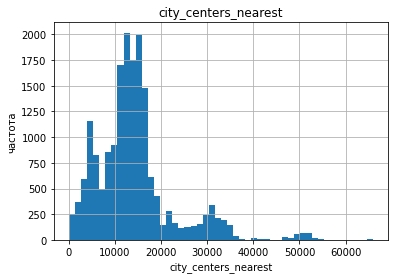

In [75]:
print('Количество пропущенных значений:', data['city_centers_nearest'].isna().sum())
print()
print('Уникальные значения:', data['city_centers_nearest'].sort_values().unique())
print()
print('Описательная статистика:',data['city_centers_nearest'].describe())
print()
data['city_centers_nearest'].hist(bins=50)
plt.title('city_centers_nearest')
plt.xlabel('city_centers_nearest')
plt.ylabel('частота')
plt.show()

Оставляем без изменеий

##### Столбец parks_nearest (расстояние до ближайшего парка, м) и <br>ponds_nearest (расстояние до ближайшего водоема, м)

Количество пропущенных значений: 15323

Описательная статистика: count    8146.000000
mean      480.817456
std       345.044976
min         0.000000
25%       278.000000
50%       447.000000
75%       609.000000
max      3190.000000
Name: parks_nearest, dtype: float64



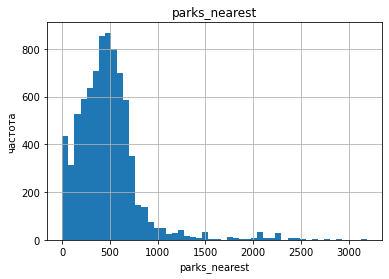

In [76]:
print('Количество пропущенных значений:', data['parks_nearest'].isna().sum())
print()
print('Описательная статистика:',data['parks_nearest'].describe())
print()
data['parks_nearest'].hist(bins=50)
plt.title('parks_nearest')
plt.xlabel('parks_nearest')
plt.ylabel('частота')
plt.show()

Количество пропущенных значений: 14356

Описательная статистика: count    9113.000000
mean      511.549435
std       282.367955
min         0.000000
25%       284.000000
50%       499.000000
75%       726.000000
max      1344.000000
Name: ponds_nearest, dtype: float64



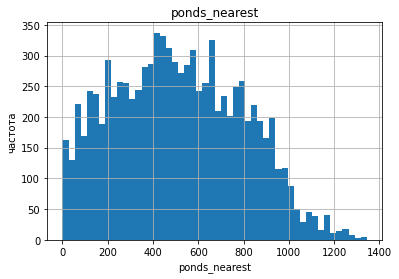

In [77]:
print('Количество пропущенных значений:', data['ponds_nearest'].isna().sum())
print()
print('Описательная статистика:',data['ponds_nearest'].describe())
print()
data['ponds_nearest'].hist(bins=50)
plt.title('ponds_nearest')
plt.xlabel('ponds_nearest')
plt.ylabel('частота')
plt.show()

Оставляем данные без изменений

#### Вывод

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23469 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23469 non-null  int64         
 1   last_price            23469 non-null  int64         
 2   total_area            23469 non-null  float64       
 3   first_day_exposition  23469 non-null  datetime64[ns]
 4   rooms                 23469 non-null  int64         
 5   ceiling_height        23469 non-null  float64       
 6   floors_total          23469 non-null  int64         
 7   living_area           23469 non-null  float64       
 8   floor                 23469 non-null  int64         
 9   is_apartment          23469 non-null  bool          
 10  studio                23469 non-null  bool          
 11  open_plan             23469 non-null  bool          
 12  kitchen_area          23469 non-null  float64       
 13  balcony         

Из первоначальных 23699 строк оставили 23469.<br><br> * Удалили пропуски в locality_name (так как данные без привязки к населенному пункту не исмеют смысла), и floors_total (этажей в доме). В обоих случаях пропусков было незначительное количество - менее 1%. <br><br> * Заменили типаы данных в столбцах first_day_exposition, last_price, floors_total, balcony, days_exposition. <br><br> * Пропуски в столбце is_apartment заменены на False (так как подразумевается база о продаже жилых квартир, а не нежилых помещений и их пропусков было достаточно много). <br><br> * В столбце ceiling_height (высота потолков) удалены строки с высотой менее 2,3 м и более 10 м, исправлены некорректные значения (разделили высоту на 10), а оставшиеся пропуски заменили медианой по группировке по населенному пункту и этажности. <br><br> *  В столбце living_area (жилая площать, м2) удалены строки со значениями менее 10 м2 и более 250 м2, а оставшиеся пропуски заменили медианой по группировке по населенному пункту, общей площади и комнатам. <br><br> *   В столбце kitchen_area (площадь кухни, м2) заменены пропуски на 0, где количество комнат в квартире равно 0, а оставшиеся пропуски заменили медианой по группировке по населенному пункту, общей площади и комнатам.<br><br> *   Вычислять и заменять пропуски по удаленности от аэропорта, от центра города, до ближайшего парка и до ближайшего водоема не стала, ошибки, видимо, возникли изз-за привязки к картам (возможно при выгрузке данных), в связи с тем, что эти данные картографические.. <br><br> *  Также много пропусков обнаружено в количестве дней публикации, но удалять строки не стала, так как большинство пропусков приходится на последние года и есть риск потерять много информации.

### Посчитайте и добавьте в таблицу новые столбцы

In [79]:
# цена одного квадратного метра
# делим цену на общую площадь 

data['price_square_meter'] = data['last_price'] / data['total_area']

In [80]:
# день недели публикации объявления (0 - понедельник, 1 - вторники, ... , 6 - воскресенье)

data['day_publication'] = data['first_day_exposition'].dt.weekday

In [81]:
# месяц публикации объявления

data['month_publication'] = data['first_day_exposition'].dt.month

In [82]:
# год публикации объявления

data['year_publication'] = data['first_day_exposition'].dt.year

In [83]:
# тип этажа квартиры (значения - "первый", "последний", "другой")
# Группа этажа по значению из столбца 'floor', используя правила:
    #- 'первый', если floor = 1;
    #- 'последний', если floor = floors_total;
    #- 'другой' - все остальные.


def type_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        return 'без категории'
    
data['type_floor'] = data.apply(type_floor, axis=1)

In [84]:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [85]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,<NA>,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.60,14,54.0,9,False,...,2.0,84.0,3.0,234.0,424,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой


In [86]:
# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
print(data['city_centers_nearest_km'])

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23560     4.0
23561     NaN
23562     NaN
23563    10.0
23564     NaN
Name: city_centers_nearest_km, Length: 23469, dtype: float64


### Проведите исследовательский анализ данных

#### Изучение параметров объекта

##### Общая S, жилая S, S кухни

**Общая площадь квартиры -  total_area, м2**

In [87]:
data['total_area'].describe()

count    23469.000000
mean        60.059174
std         33.507090
min         13.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.000000
Name: total_area, dtype: float64

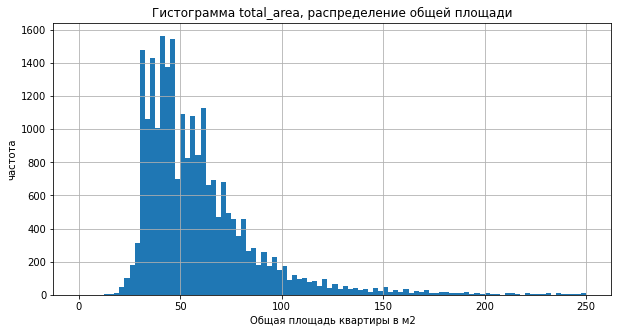

In [88]:
data.hist('total_area', bins=100, figsize = (10,5), range=(0, 250))
plt.title('Гистограмма total_area, распределение общей площади')
plt.xlabel('Общая площадь квартиры в м2')
plt.ylabel('частота')
plt.show()

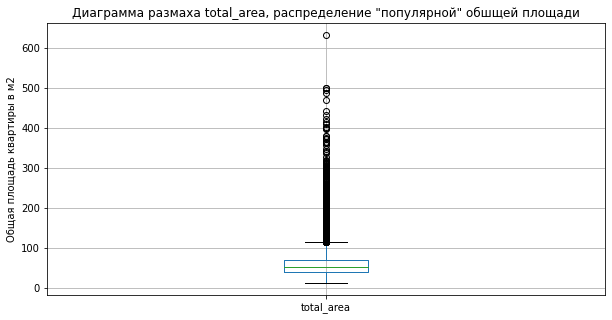

In [89]:
data.boxplot(column='total_area', figsize = (10,5))
plt.title('Диаграмма размаха total_area, распределение "популярной" обшщей площади')
plt.ylabel('Общая площадь квартиры в м2')
plt.show()

На гистограмме видно, что большинство большинство квартир находятся  в диапазоне площадей от 25 до 90 кв.м. При этом среднее и медианное значения 60 м2 и 52 м2 соответственно. Квартиры больше 120 м2 редкое явление. <br><br> Отсечем квартиры более 120 м2:

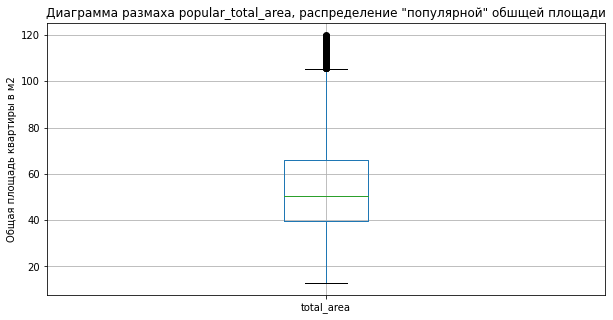

In [90]:
popular_total_area = data.query('total_area < 120')
popular_total_area.boxplot('total_area', figsize = (10,5), grid=True)
plt.title('Диаграмма размаха popular_total_area, распределение "популярной" обшщей площади')
plt.ylabel('Общая площадь квартиры в м2')
plt.show()

In [91]:
popular_total_area['total_area'].describe()

count    22398.000000
mean        54.785547
std         19.910719
min         13.000000
25%         39.625000
50%         50.500000
75%         66.000000
max        119.800000
Name: total_area, dtype: float64

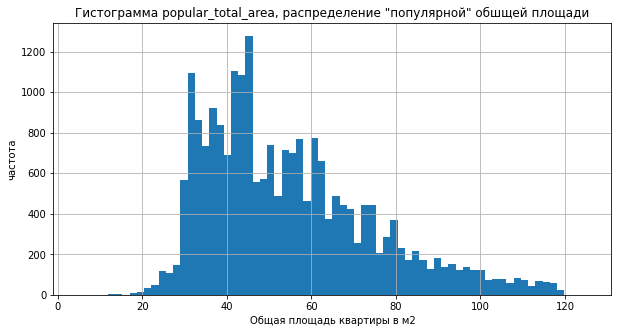

In [92]:
popular_total_area.hist('total_area', bins=70, figsize = (10,5), range=(5, 125))
plt.title('Гистограмма popular_total_area, распределение "популярной" обшщей площади')
plt.xlabel('Общая площадь квартиры в м2')
plt.ylabel('частота')
plt.show()

Обе гистограммы total_area и popular_total_area имеют форму распределения Пуассона. <br><br> Нижний "ус" диаграммы размаха соответствует минимальному значению 13, верхний ус заканчивается на 105. Это ориентировочные границы нормального размаха. Выбросы отрезаны более 120 м2. Медианное значение "популярной" общей площади 50,5 м2, среднее значение 54,8 м2. <br><br> Межквартильный размах popular_total_area ("популярной" общей площади) содержит основную часть данных общей площади. Т.е. в большинстве случаев общая площадь квартир составляет от 40,0 м2 до 66 м2.

**Жилая площадь квартиры - living_area, м2**

In [93]:
data['living_area'].describe()

count    23469.000000
mean        34.102406
std         20.183192
min         10.080000
25%         18.900000
50%         30.000000
75%         42.000000
max        248.700000
Name: living_area, dtype: float64

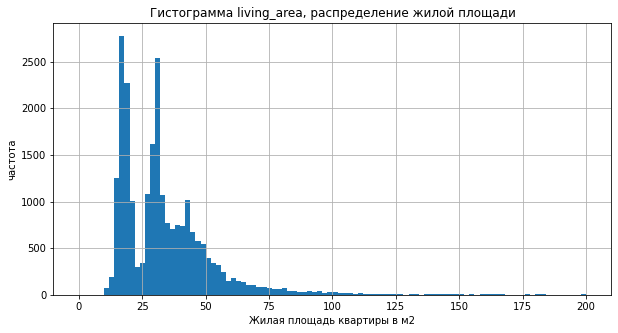

In [94]:
data.hist('living_area', bins=100, figsize = (10,5), range=(0, 200))
plt.title('Гистограмма living_area, распределение жилой площади')
plt.xlabel('Жилая площадь квартиры в м2')
plt.ylabel('частота')
plt.show()

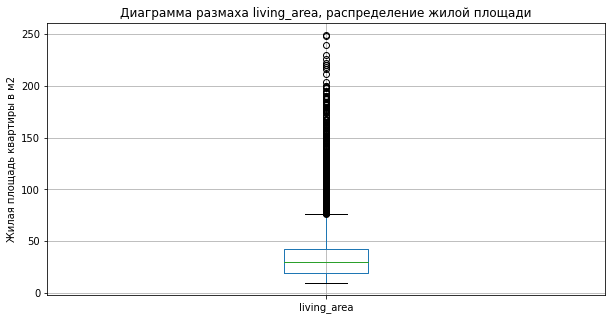

In [95]:
data.boxplot(column='living_area', figsize = (10,5))
plt.title('Диаграмма размаха living_area, распределение жилой площади')
plt.ylabel('Жилая площадь квартиры в м2')
plt.show()

Отсечем квартиры с жилой площадью более 75 м2:

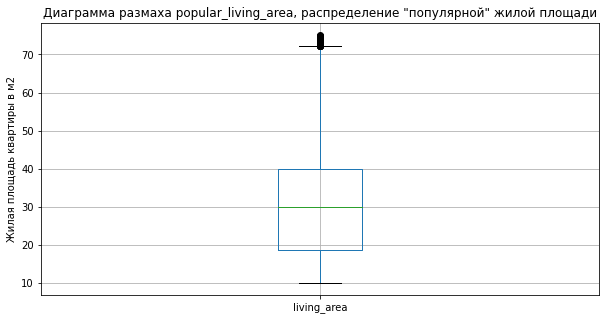

In [96]:
popular_living_area = data.query('living_area < 75')
popular_living_area.boxplot('living_area', figsize = (10,5), grid=True)
plt.title('Диаграмма размаха popular_living_area, распределение "популярной" жилой площади')
plt.ylabel('Жилая площадь квартиры в м2')
plt.show()

In [97]:
popular_total_area['living_area'].describe()

count    22398.000000
mean        31.292021
std         13.562236
min         10.080000
25%         18.500000
50%         30.000000
75%         40.000000
max        101.000000
Name: living_area, dtype: float64

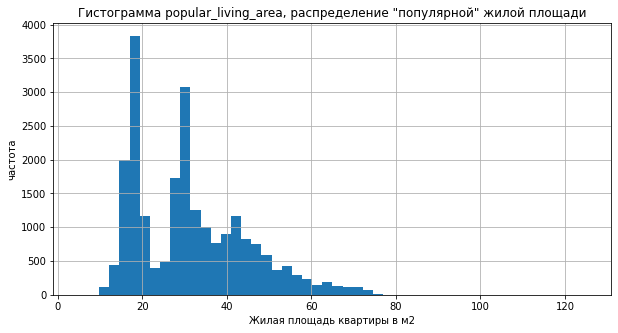

In [98]:
popular_living_area.hist('living_area', bins=50, figsize = (10,5), range=(5, 125))
plt.title('Гистограмма popular_living_area, распределение "популярной" жилой площади')
plt.xlabel('Жилая площадь квартиры в м2')
plt.ylabel('частота')
plt.show()

Обе гистограммы living_area и popular_living_area имеют форму распределения Пуассона.

Нижний "ус" диаграммы размаха соответствует минимальному значению 10, верхний ус заканчивается на 72. Это ориентировочные границы нормального размаха. Выбросы отрезаны более 75 м2. Медианное значение "популярной" общей площади 30,0 м2, среднее значение 31,3 м2.

Межквартильный размах popular_living_area ("популярной" жилой площади) содержит основную часть данных жилой площади. Т.е. в большинстве случаев жилая площадь квартир составляет от 18,5 м2 до 40 м2.

**Площадь кухни kitchen_area**

In [99]:
data['kitchen_area'].describe()

count    23469.000000
mean        10.372354
std          5.664469
min          0.000000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64

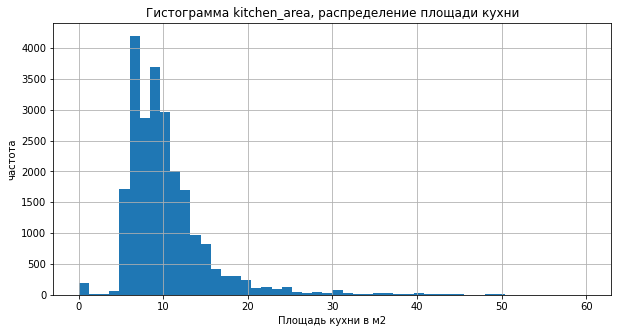

In [100]:
data.hist('kitchen_area', bins=50, figsize = (10,5), range=(0, 60))
plt.title('Гистограмма kitchen_area, распределение площади кухни')
plt.xlabel('Площадь кухни в м2')
plt.ylabel('частота')
plt.show()

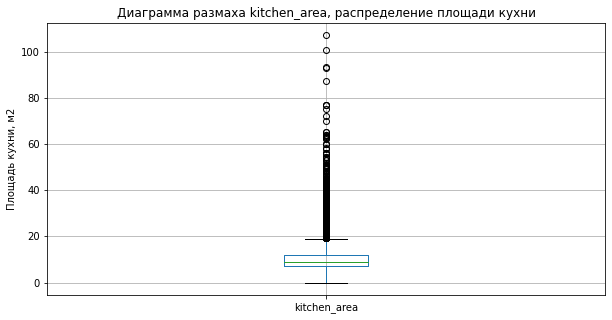

In [101]:
data.boxplot(column='kitchen_area', figsize = (10,5))
plt.title('Диаграмма размаха kitchen_area, распределение площади кухни')
plt.ylabel('Площадь кухни, м2')
plt.show()

Значение 0 (ноль) не аномальное. мы заменяли пропуски в площади кухни в квартирах-студиях (число комнат равно 0) на 0 (ноль). <br><br> Отсечем квартиры с площадью кухни более 20 м2:

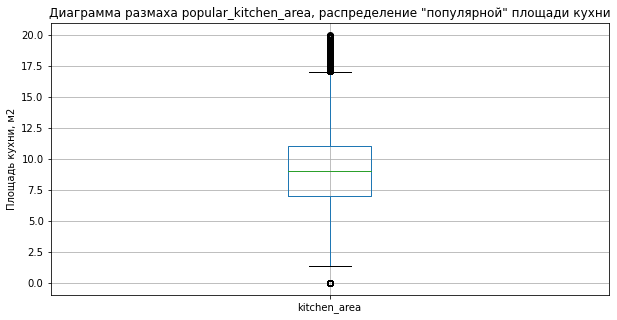

In [102]:
popular_kitchen_area = data.query('kitchen_area < 20')
popular_kitchen_area.boxplot('kitchen_area', figsize = (10,5), grid=True)
plt.title('Диаграмма размаха popular_kitchen_area, распределение "популярной" площади кухни')
plt.ylabel('Площадь кухни, м2')
plt.show()

In [103]:
popular_total_area['kitchen_area'].describe()

count    22398.000000
mean         9.818600
std          4.431873
min          0.000000
25%          7.000000
50%          9.000000
75%         11.100000
max         64.000000
Name: kitchen_area, dtype: float64

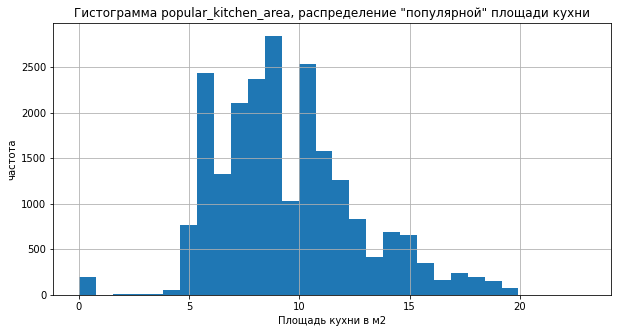

In [104]:
popular_kitchen_area.hist('kitchen_area', bins=30, figsize = (10,5), range=(0, 23))
plt.title('Гистограмма popular_kitchen_area, распределение "популярной" площади кухни')
plt.xlabel('Площадь кухни в м2')
plt.ylabel('частота')
plt.show()

Обе гистограммы kitchen_area и popular_kitchen_area имеют форму распределения Пуассона.

Нижний "ус" диаграммы размаха соответствует минимальному значению 0, верхний ус заканчивается на 17. Это ориентировочные границы нормального размаха. Выбросы отрезаны более 20 м2. Медианное значение "популярной" площади кухни 9,0 м2, среднее значение 9,8 м2.

Межквартильный размах popular_kitchen_area ("популярной" площади кухни) содержит основную часть данных площади. Т.е. в большинстве случаев площадь кухни составляет от 7,0 м2 до 11,1 м2.

##### Цена объекта

In [105]:
data['last_price'].describe()

count    2.346900e+04
mean     6.432081e+06
std      8.893231e+06
min      1.219000e+04
25%      3.408000e+06
50%      4.650000e+06
75%      6.790000e+06
max      4.013000e+08
Name: last_price, dtype: float64

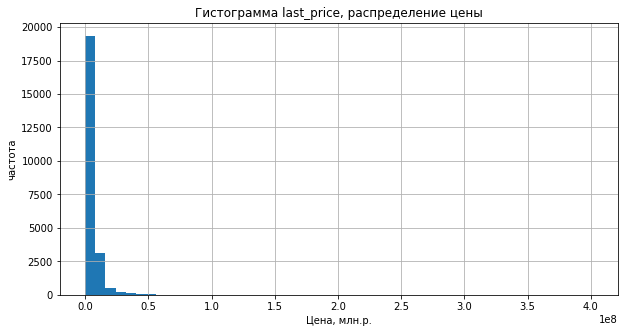

In [106]:
data.hist('last_price', bins=50, figsize = (10,5))
plt.title('Гистограмма last_price, распределение цены')
plt.xlabel('Цена, млн.р.')
plt.ylabel('частота')
plt.show()

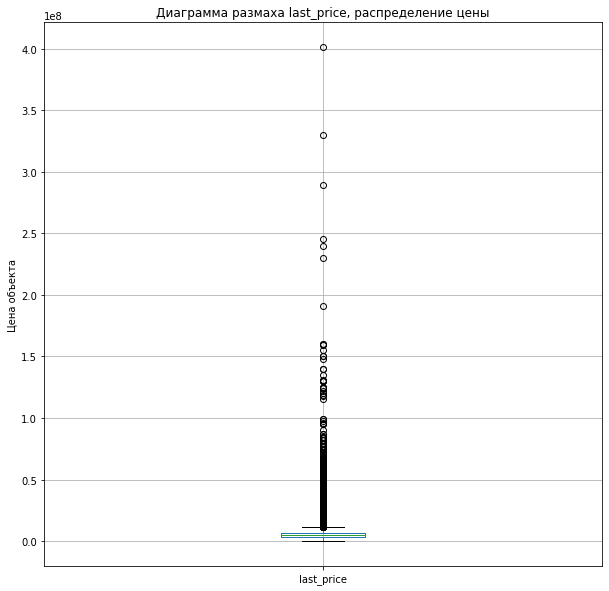

In [107]:
data.boxplot(column='last_price', figsize = (10,10))
plt.title('Диаграмма размаха last_price, распределение цены')
plt.ylabel('Цена объекта')
plt.show()

Гисторамма значений цены объекта имеет форму распределения Пуассона.<br><br>
Среднее значение цены квартиры 6,43 млн руб., медиана 4,65 млн руб. Среднее значение значительно больше медианы, так как мы имеем очень много выбросов в наличии в верхних значениях. В большинстве случаев (Межквартильный размах) цена квартиры составляет от 3,41 млн руб. до 6,79 млн руб (Это относится к "популярным" квартирам)

##### Количество комнат rooms и высота потолков ceiling_height

**Количество комнат rooms**

In [108]:
data['rooms'].describe()

count    23469.000000
mean         2.068516
std          1.061831
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

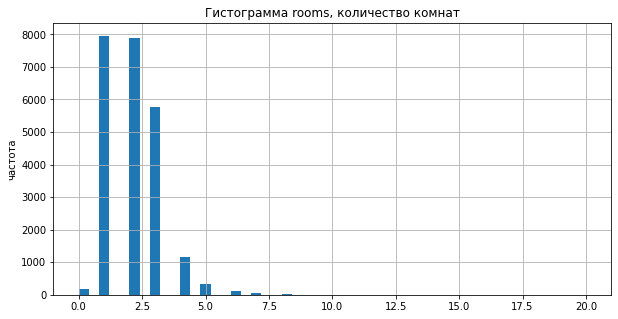

In [109]:
data.hist('rooms', bins=50, figsize = (10,5), range=(0, 20))
plt.title('Гистограмма rooms, количество комнат')
plt.ylabel('частота')
plt.show()

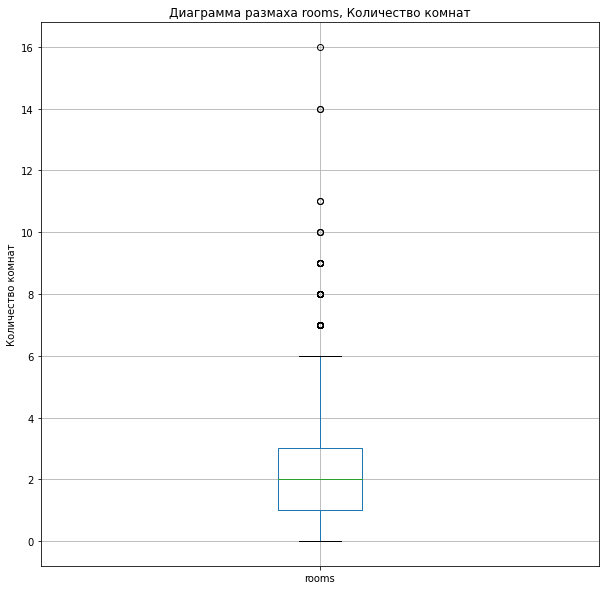

In [110]:
data.boxplot(column='rooms', figsize = (10,10))
plt.title('Диаграмма размаха rooms, Количество комнат')
plt.ylabel('Количество комнат')
plt.show()

Гисторамма значений rooms количество комнат имеет форму распределения Пуассона.<br><br>
Среднее значение rooms совпадает с медианным и равно 2. Мы имеем выбросы в наличии в верхних значениях (они касаются квартир с большой площадью и не относятся к "популярным"). В большинстве случаев количество комнат квартиры равняется 1-3 комнаты (межквартильный размах).

**Высота потолков ceiling_height**

In [111]:
data['ceiling_height'].describe()

count    23469.000000
mean         2.708679
std          0.248377
min          2.300000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

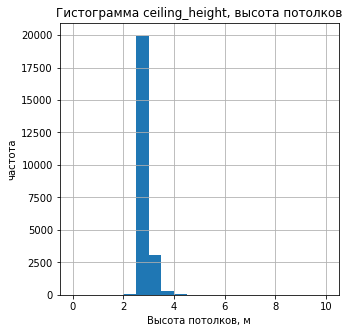

In [112]:
data.hist('ceiling_height', bins=20, figsize = (5,5), range=(0, 10))
plt.title('Гистограмма ceiling_height, высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('частота')
plt.show()

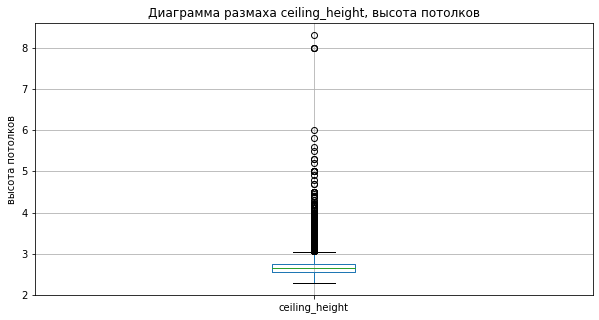

In [113]:
data.boxplot(column='ceiling_height', figsize = (10,5))
plt.title('Диаграмма размаха ceiling_height, высота потолков')
plt.ylabel('высота потолков')
plt.show()

Гисторамма значений ceiling_height (высота потолков) имеет форму распределения Пуассона.<br><br>
Среднее значение ceiling_height 2,71 м, медианное равно 2,65. Мы имеем выбросы в наличии в верхних значениях (они касаются квартир с высокими потолками и не относятся к "популярным"). В большинстве случаев высота потолков квартиры от 2,55 до 2,75 м (межквартильный размах).

##### Этажность

**Этаж квартиры floor**

In [114]:
data['floor'].describe()

count    23469.000000
mean         5.875708
std          4.869485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

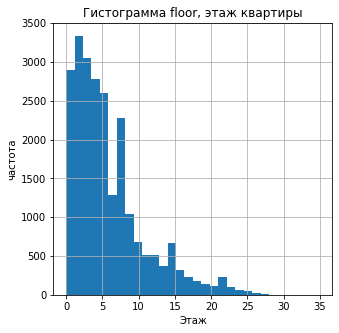

In [115]:
data.hist('floor', bins=30, figsize = (5,5), range=(0, 35))
plt.title('Гистограмма floor, этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('частота')
plt.show()

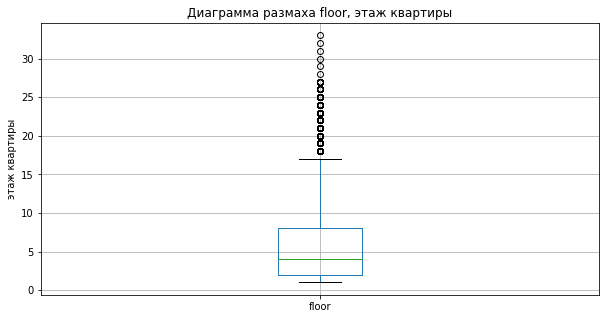

In [116]:
data.boxplot(column='floor', figsize = (10,5))
plt.title('Диаграмма размаха floor, этаж квартиры')
plt.ylabel('этаж квартиры')
plt.show()

Гисторамма значений floor (этаж квартиры) имеет форму распределения Пуассона.<br><br>
Среднее значение floor 5,8, медианное равно 4 этаж. Мы имеем выбросы в наличии в верхних значениях (они касаются квартир с большим количеством этажей и не относятся к "популярным"). В большинстве случаев этаж квартиры от 2 до 8 (межквартильный размах).

**Тип этажа квартиры type_floor**

In [117]:
data['type_floor'].describe()

count      23469
unique         3
top       другой
freq       17258
Name: type_floor, dtype: object

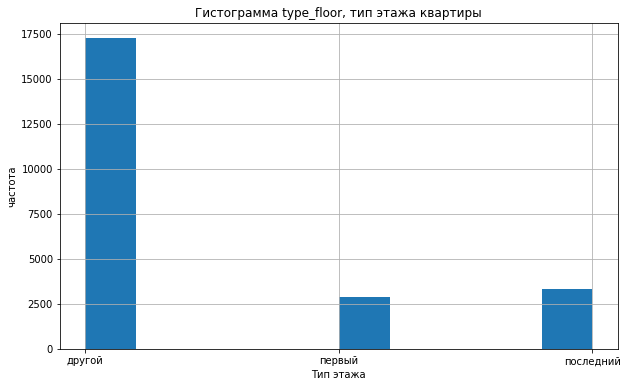

In [118]:
data['type_floor'].hist(figsize = (10, 6))
plt.title('Гистограмма type_floor, тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('частота')
plt.show()

73% квартир имеют тип этажа "другой": не первый и не последний. Квартир с типом этажа "последний" немного больше, чем с типом этажа "первый".

**Общее количество этажей в доме floors_total**

In [119]:
data['floors_total'].describe()

count    23469.000000
mean        10.675487
std          6.591467
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

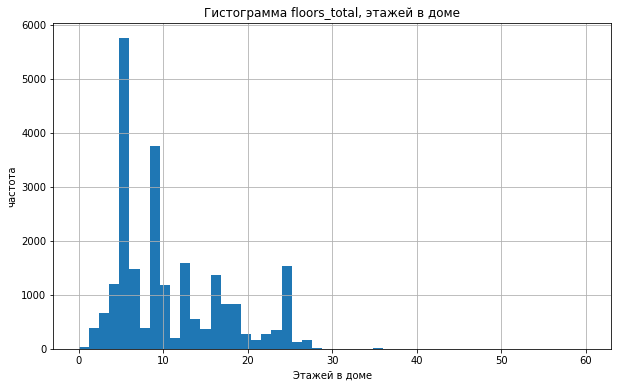

In [120]:
data.hist('floors_total', bins=50, figsize = (10, 6), range=(0, 60))
plt.title('Гистограмма floors_total, этажей в доме')
plt.xlabel('Этажей в доме')
plt.ylabel('частота')
plt.show()

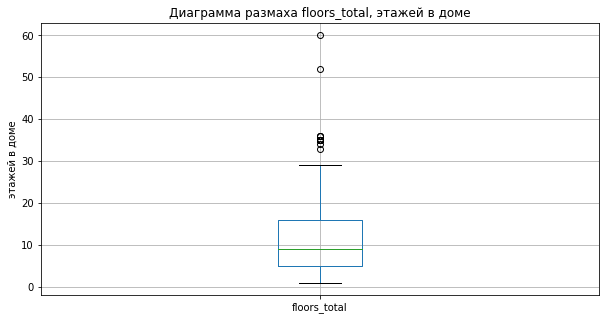

In [121]:
data.boxplot(column='floors_total', figsize = (10,5))
plt.title('Диаграмма размаха floors_total, этажей в доме')
plt.ylabel('этажей в доме')
plt.show()

Среднее значение количества этажей в доме 10,7, медиана 9,0. Мы имеем выбросы в наличии в верхних значениях (они касаются домов с большим количеством этажей и не относятся к "популярным"). В большинстве случаев этажей в доме от 5 до 16 (межквартильный размах).

##### Расстояния до центра, аэропорта, парка

**Расстояние city_centers_nearest до центра города, м**

In [122]:
data['city_centers_nearest'].describe()

count    18066.000000
mean     14142.781966
std       8644.323300
min          0.000000
25%       9176.000000
50%      13073.000000
75%      16270.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

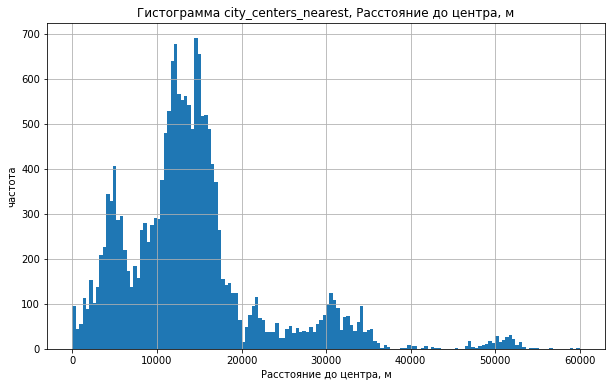

In [123]:
data.hist('city_centers_nearest', bins=150, figsize = (10, 6), range=(0, 60000))
plt.title('Гистограмма city_centers_nearest, Расстояние до центра, м')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('частота')
plt.show()

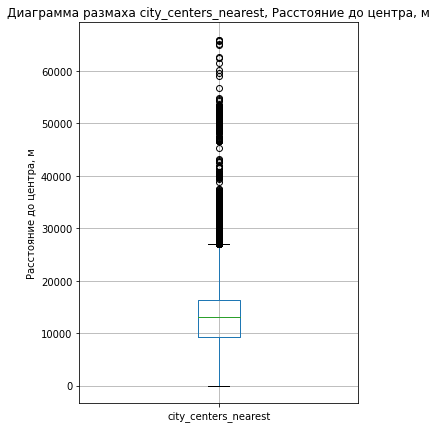

In [124]:
data.boxplot(column='city_centers_nearest', figsize = (5, 7))
plt.title('Диаграмма размаха city_centers_nearest, Расстояние до центра, м')
plt.ylabel('Расстояние до центра, м')
plt.show()

Гисторамма частоты значений расстояния до ближайшего парка имеет форму распределения Пуассона. <br><br>Среднее значение расстояния до центра города 14142,8 м (14,1 км), медиана 13073 м (13 км). Мы имеем множественные выбросы в наличии в верхних значениях (они связаны с большой площадью города Санкт-Петербург, в большинстве населенных пунктов области в столбце расстояние до центра стоят пропуски, 23% данных нет). В большинстве случаев, в общей массе адресов, расстояние находится в диапазоне (межквартильный размах) от 9176 м до 16271 м (9,2-16,2 км).

**Расстояние до аэропорта airports_nearest, м**

In [125]:
data['airports_nearest'].describe()

count    18045.000000
mean     28668.920421
std      12749.947169
min          0.000000
25%      18475.000000
50%      26662.000000
75%      37227.000000
max      84869.000000
Name: airports_nearest, dtype: float64

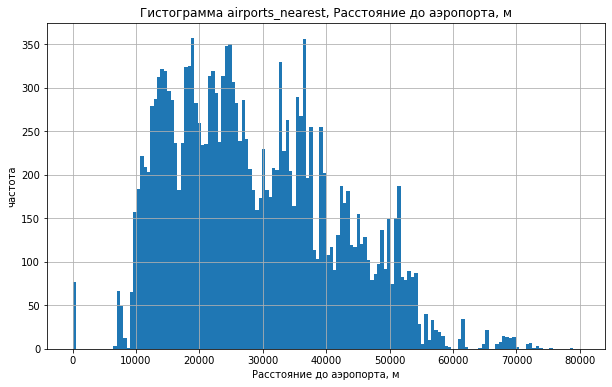

In [126]:
data.hist('airports_nearest', bins=150, figsize = (10, 6), range=(0, 80000))
plt.title('Гистограмма airports_nearest, Расстояние до аэропорта, м')
plt.xlabel('Расстояние до аэропорта, м')
plt.ylabel('частота')
plt.show()

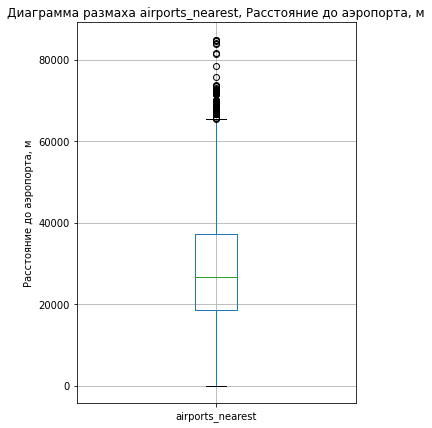

In [127]:
data.boxplot(column='airports_nearest', figsize = (5, 7))
plt.title('Диаграмма размаха airports_nearest, Расстояние до аэропорта, м')
plt.ylabel('Расстояние до аэропорта, м')
plt.show()

Гисторамма частоты значений расстояния до ближайшего парка имеет форму распределения Пуассона. <br><br>Среднее значение расстояния до центра аэропорта 28669 м (28,7 км), медиана 26662 м (26,7 км). Мы имеем выбросы в наличии в верхних значениях (они связаны с большой площадью города Санкт-Петербург, в большинстве населенных пунктов области в столбце расстояние до центра много пропусков, 23% данных нет). В большинстве случаев, в общей массе адресов, расстояние до аэропорта находится в диапазоне (межквартильный размах) от 18475 м до 37227 м (18,4-37,2 км).

**Расстояние parks_nearest до ближайшего парка, м**

In [128]:
data['parks_nearest'].describe()

count    8146.000000
mean      480.817456
std       345.044976
min         0.000000
25%       278.000000
50%       447.000000
75%       609.000000
max      3190.000000
Name: parks_nearest, dtype: float64

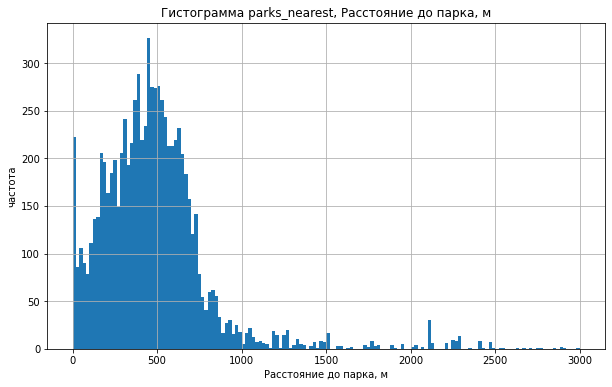

In [129]:
data.hist('parks_nearest', bins=150, figsize = (10, 6), range=(0, 3000))
plt.title('Гистограмма parks_nearest, Расстояние до парка, м')
plt.xlabel('Расстояние до парка, м')
plt.ylabel('частота')
plt.show()

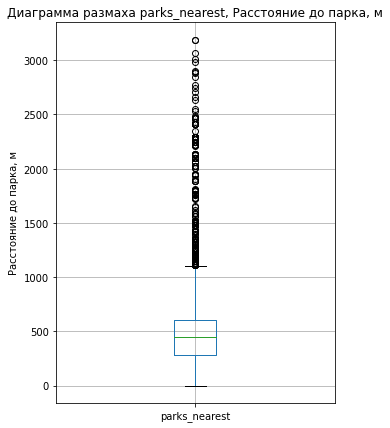

In [130]:
data.boxplot(column='parks_nearest', figsize = (5, 7))
plt.title('Диаграмма размаха parks_nearest, Расстояние до парка, м')
plt.ylabel('Расстояние до парка, м')
plt.show()

Гисторамма частоты значений расстояния до ближайшего парка имеет форму распределения Пуассона. <br><br> В таблице данных по расстоянию до ближайшего парка 45% (65% - пропуски). Среднее значение расстояния до ближайшего парка 480,8 м, медиана 477 м, практически равны. Мы имеем выбросы в наличии в верхних значениях (они связаны с большой площадью города Санкт-Петербург, в большинстве населенных пунктов области в столбце расстояние до центра много пропусков, 65% данных нет). В большинстве случаев, в общей массе адресов, расстояние до до ближайшего парка находится в диапазоне (межквартильный размах) от 278 м до 609 м.

##### Дата публикации объявления

**Дни недели**

In [131]:
data['day_publication'].describe()

count    23469.000000
mean         2.568026
std          1.787842
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_publication, dtype: float64

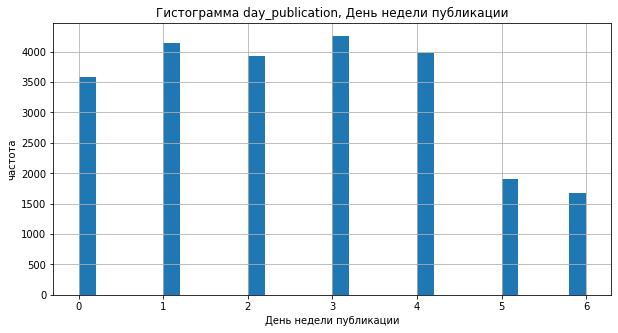

In [132]:
data.hist('day_publication', bins=30, figsize = (10, 5), range=(0, 6))
plt.title('Гистограмма day_publication, День недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('частота')
plt.show()

# день недели публикации объявления (0 - понедельник, 1 - вторники, ... , 6 - воскресенье)

Лидеры по количеству объявлений - вторник и четверг, на втором месте - среда и пятница, далее - понедельник. В субботу и воскресенье размещение объявлений меньше чем в остальные дни более чем в 2 раза. Среднее значение 2,6, медиана 3,0. Самое большое количество объявлений от 1 до 4 (вторник, среда, четверг, пятница).

**Месяц публикации объявления**

In [133]:
data['month_publication'].describe()

count    23469.000000
mean         6.401764
std          3.492759
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

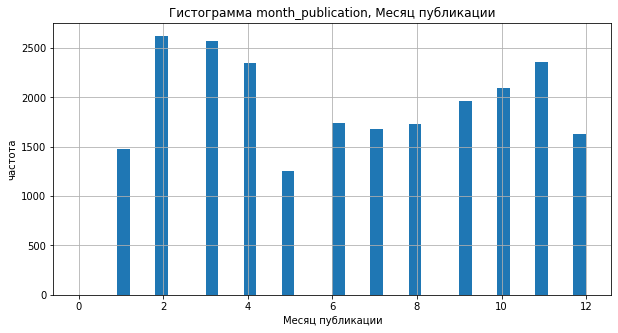

In [134]:
data.hist('month_publication', bins=40, figsize = (10, 5), range=(0, 12))
plt.title('Гистограмма month_publication, Месяц публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('частота')
plt.show()

Лидеры по количеству объявлений - февраль, март, апрель, ноябрь. На втором месте - сентябрь, октябрь, декабрь. Далее - июнь, июль, август,. В январе и мае размещение объявлений меньше, чем в остальные месяцы, возможно это связано с блительными выходными. Среднее значение 6,4, медиана 6. Самое большое количество объявлений от 3 до 10.

#### Скорость продажи квартиры

In [135]:
data['days_exposition'].describe()

count    20326.000000
mean       180.871347
std        219.763989
min          0.000000
25%         46.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

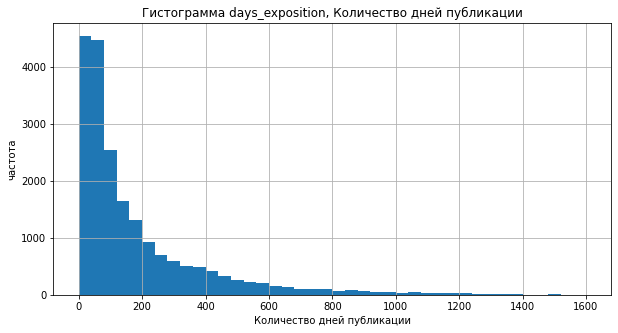

In [136]:
data.hist('days_exposition', bins=40, figsize = (10, 5), range=(0, 1600))
plt.title('Гистограмма days_exposition, Количество дней публикации')
plt.xlabel('Количество дней публикации')
plt.ylabel('частота')
plt.show()

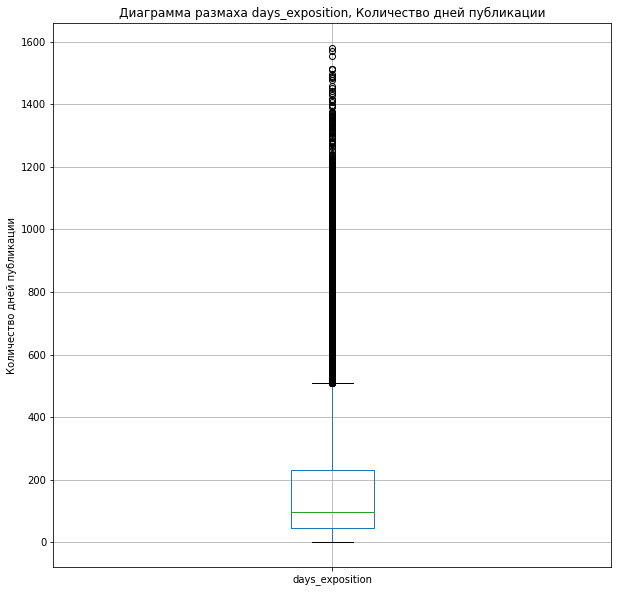

In [137]:
data.boxplot(column='days_exposition', figsize = (10, 10))
plt.title('Диаграмма размаха days_exposition, Количество дней публикации')
plt.ylabel('Количество дней публикации')
plt.show()

In [138]:
# тип продажи (значения - "быстрая", "нормальная", "долгая" (до 2х лет), "необычно долгая" (от 2х до 4х лет))
# Тип продажи по значению из столбца 'days_exposition', используя правила:
    #- 'быстрая', если days_exposition от 1 до 45 включительно;
    #- 'нормальная', если days_exposition от 46 до 231 включительно;
    #- 'долгая' - если days_exposition от 232 до 730 включительно;
    #- 'необычно долгая' - если days_exposition от 731 до 1580 включительно;


def type_days_exposition(row):
    try:
        if 1 <= row['days_exposition'] <= 45:
            return 'быстрая'
        elif 46 <= row['days_exposition'] <= 231:
            return 'нормальная'
        elif 232 <= row['days_exposition'] <= 730:
            return 'долгая'
        return 'необычно долгая'
    except:
        return 'без категории'
    
data['type_days_exposition'] = data.apply(type_days_exposition, axis=1)

In [139]:
data['type_days_exposition'].unique()

array(['без категории', 'нормальная', 'долгая', 'быстрая',
       'необычно долгая'], dtype=object)

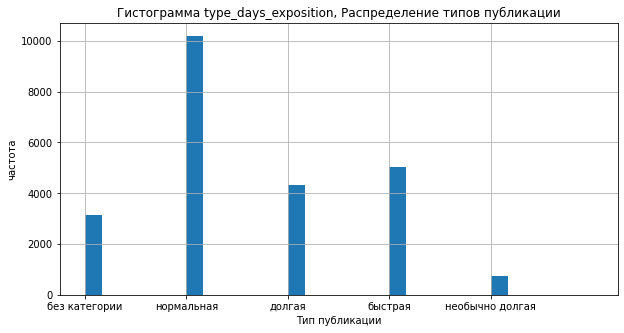

In [140]:
data['type_days_exposition'].hist(bins=30, figsize = (10, 5), range=(0, 5))
plt.title('Гистограмма type_days_exposition, Распределение типов публикации')
plt.xlabel('Тип публикации')
plt.ylabel('частота')
plt.show()

Гисторамма количества дней публикации объявления имеет форму распределения Пуассона. <br><br> Среднее значение количества дней 181 день, а медиана 95 дней, меньше среднего в два раза. Такое различие говорит о том, что мы имеем множественные выбросы в наличии в верхних значениях (они связаны с тем, что некоторые объявления были опубликованы 3-4 года). В большинстве случаев количество дней находится в диапазоне (межквартильный размах) от 46 дней до 231 дня.<br><br> Следовательно, мы можем сказать, что быстрые продажи - это продажи от 1 до 45 дней, долгие от 232 до 730, а необычно долгие от 731 до 1580 дней. В категорию "без категории" попали пропущенные значения.

#### Какие факторы влияют на цену объекта

**Зависимость цены от площади**

In [141]:
def factor(column):
    print()
    print('Коэффициент корреляции last_price от', column, data[column].corr(data['last_price']))
    data.plot(x='last_price', y=column, kind='scatter', alpha=0.3)
    plt.title('Зависимость цены')
    plt.show() 

**Зависимость от общей площади**


Коэффициент корреляции last_price от total_area 0.6819570859434599


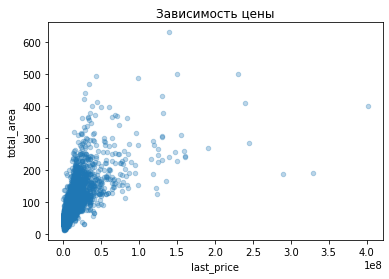

In [142]:
# Зависимость цены от общей площади

factor('total_area')

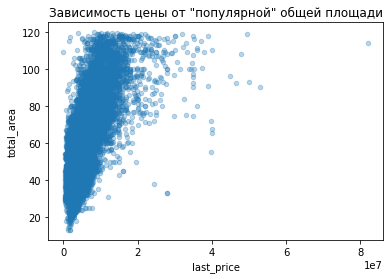

In [143]:
# Зависимость цены от "популярной" общей площади

popular_total_area.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.title('Зависимость цены от "популярной" общей площади')
plt.xlabel('last_price')
plt.ylabel('total_area')
plt.show()

In [144]:
popular_total_area['last_price'].corr(popular_total_area['total_area'])

0.689960546234031

Коэффициент в обоих случаях положительный и корреляция общей площади и "популярной" общей площади почти равны. Здесь прямая зависимость: чем больше площадь, тем выше цена.

**Зависимость от жилой площади**


Коэффициент корреляции last_price от living_area 0.5576067894831839


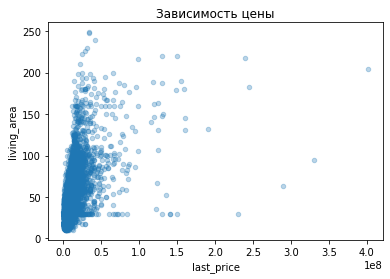

In [145]:
# Зависимость цены от жилой площади 

factor('living_area')

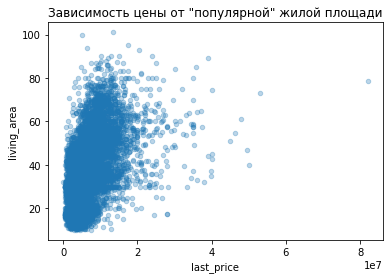

In [146]:
# Зависимость цены от "популярной" жилой площади

popular_total_area.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)
plt.title('Зависимость цены от "популярной" жилой площади')
plt.xlabel('last_price')
plt.ylabel('living_area')
plt.show()

In [147]:
popular_total_area['last_price'].corr(popular_total_area['living_area'])

0.551776152997338

Коэффициент в обоих случаях положительный и корреляция жилой площади и "популярной" жилой площади почти равны. Здесь прямая зависимость: чем больше площадь, тем выше цена.

**Зависимость цены от площади кухни**


Коэффициент корреляции last_price от kitchen_area 0.48823438686843973


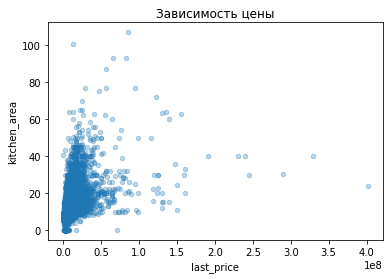

In [148]:
# Зависимость цены от площади кухни 

factor('kitchen_area')

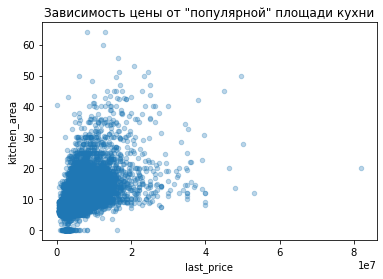

In [149]:
# Зависимость цены от "популярной" площади кухни

popular_total_area.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)
plt.title('Зависимость цены от "популярной" площади кухни')
plt.xlabel('last_price')
plt.ylabel('kitchen_area')
plt.show()

In [150]:
popular_total_area['last_price'].corr(popular_total_area['kitchen_area'])

0.5318209025244554

Коэффициент положительный в обоих случаях, имеет небольшое отличие. Прямая зависимость цены от площади кухни: чем больше площадь тем выше цена.

**Зависимость от количества комнат**


Коэффициент корреляции last_price от rooms 0.38503884856389586


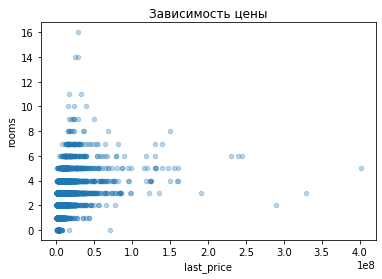

In [151]:
# Зависимость цены от количества комнат

factor('rooms')

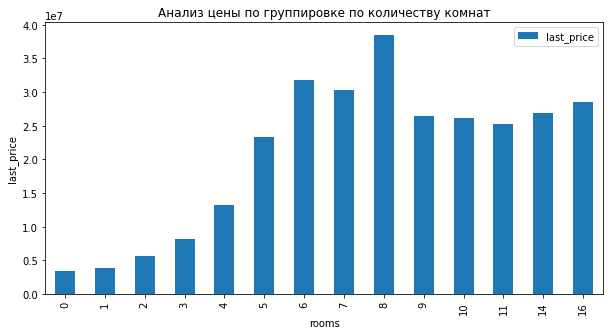

In [152]:
# анализ цены по группировке по количеству комнат

type_rooms = data.pivot_table(index='rooms', values='last_price').plot(y='last_price', kind='bar', figsize=(10, 5))
plt.title('Анализ цены по группировке по количеству комнат')
plt.xlabel('rooms')
plt.ylabel('last_price')
plt.show()

Коэффициент положительный, но снижается. Цена зависит от количества комнат , более в случаях, если комнат от 2 до 8, далее коэффициент снижается. 

**Зависимоть цены от этажа вкартиры**


Коэффициент корреляции last_price от floor 0.024372482041067137


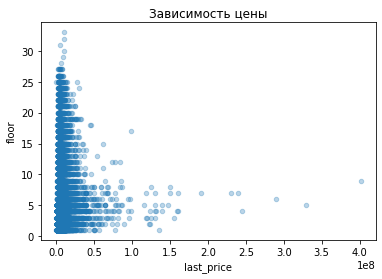

In [153]:
# Зависимость цены от этажа, на котором расположена квартира

factor('floor')

**Зависимость цены от типа этажа, на котором находится квартира**

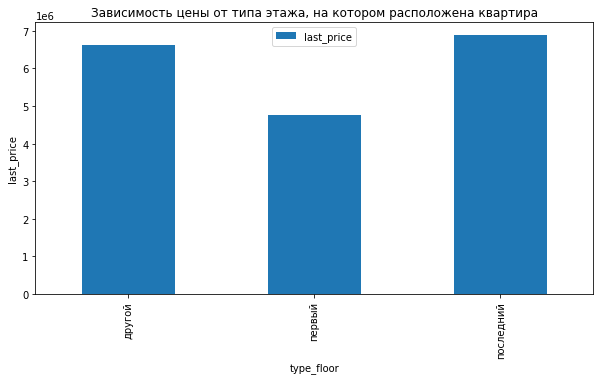

In [154]:
# Зависимость цены от типа этажа, на котором расположена квартира

type_floor = data.pivot_table(index='type_floor', values='last_price').plot(y='last_price', kind='bar', figsize=(10, 5))
plt.title('Зависимость цены от типа этажа, на котором расположена квартира')
plt.xlabel('type_floor')
plt.ylabel('last_price')
plt.show()

**Зависимость цены от дня размещения объявления**

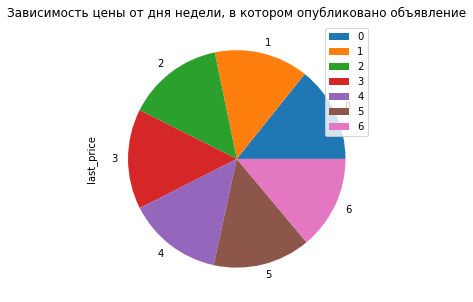

In [155]:
# Зависимость цены от дня недели, в котором опубликовано объявление

type_floor = data.pivot_table(index='day_publication', values='last_price').plot(
    x='day_publication', y='last_price', kind='pie', figsize=(5, 5)
)
plt.title('Зависимость цены от дня недели, в котором опубликовано объявление')
plt.show()

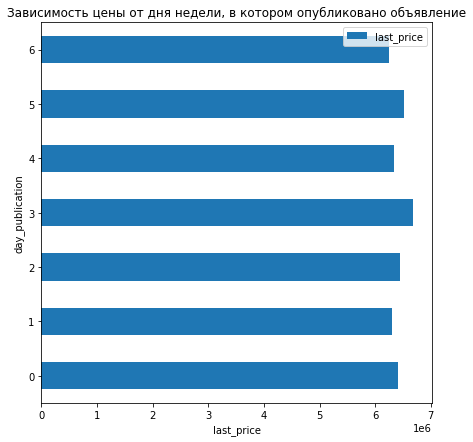

In [156]:
# Зависимость цены от дня недели, в котором опубликовано объявление

type_floor = data.pivot_table(index='day_publication', values='last_price').plot(
    y='last_price', kind='barh', figsize=(7, 7)
)
plt.title('Зависимость цены от дня недели, в котором опубликовано объявление')
plt.xlabel('last_price')
plt.ylabel('day_publication')
plt.show()

**День размещения объявления практически никак не влияет на цену.**

**Зависимость цены от месяца размещения объявления**

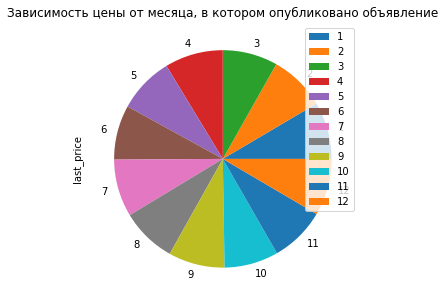

In [157]:
# Зависимость цены от месяца, в котором опубликовано объявление

type_floor = data.pivot_table(index='month_publication', values='last_price').plot(
    x='day_publication', y='last_price', kind='pie', figsize=(5, 5)
)
plt.title('Зависимость цены от месяца, в котором опубликовано объявление')
plt.show()

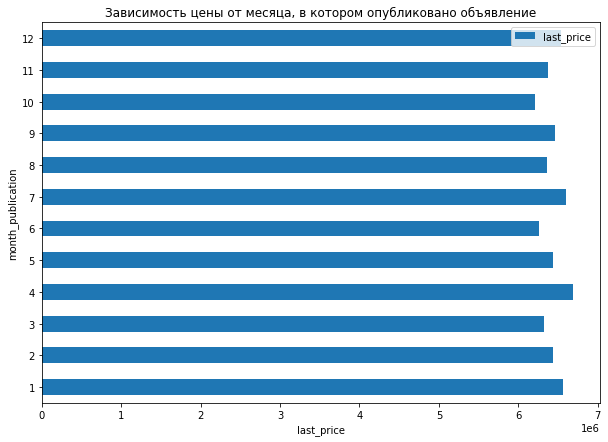

In [158]:
# Зависимость цены от месяца, в котором опубликовано объявление

type_floor = data.pivot_table(index='month_publication', values='last_price').plot(
    y='last_price', kind='barh', figsize=(10, 7)
)
plt.title('Зависимость цены от месяца, в котором опубликовано объявление')
plt.xlabel('last_price')
plt.ylabel('month_publication')
plt.show()

**Месяц размещения объявления совсем незначительно влияет на цену.**

**Зависимость цены от года размещения объявления**

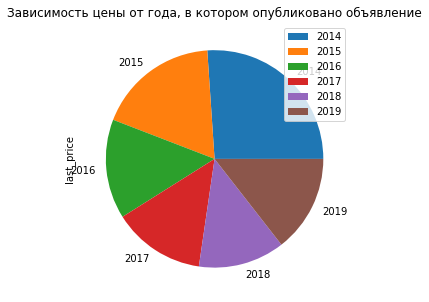

In [159]:
# Зависимость цены от года, в котором опубликовано объявление

type_floor = data.pivot_table(index='year_publication', values='last_price').plot(
    x='day_publication', y='last_price', kind='pie', figsize=(5, 5)
)
plt.title('Зависимость цены от года, в котором опубликовано объявление')
plt.show()

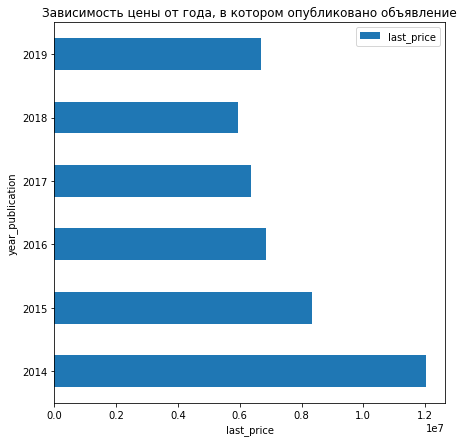

In [160]:
# Зависимость цены от года, в котором опубликовано объявление

type_floor = data.pivot_table(index='year_publication', values='last_price').plot(
    y='last_price', kind='barh', figsize=(7, 7)
)
plt.title('Зависимость цены от года, в котором опубликовано объявление')
plt.xlabel('last_price')
plt.ylabel('year_publication')
plt.show()

**Год размещения объявления совсем незначительно влияет на цену. 2014 не совсем подходит для сравнения, так как в последние годы есть много пропусков информации, а цены 2014 и 2019 различны**

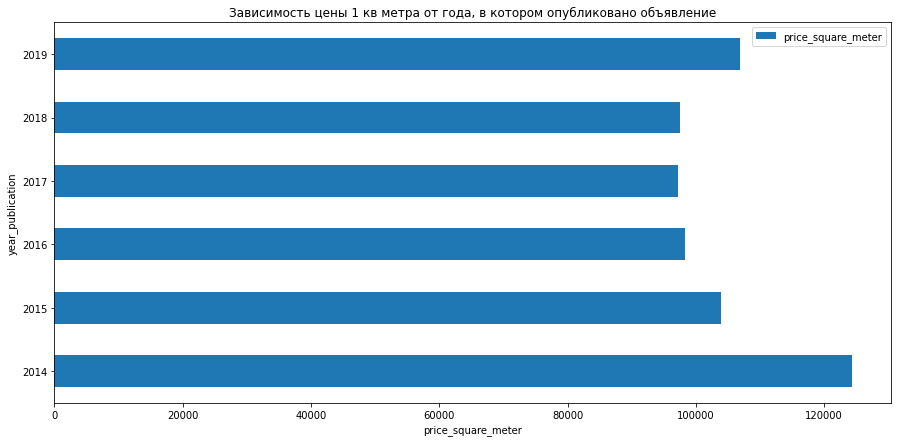

In [161]:
type_floor = data.pivot_table(index='year_publication', values='price_square_meter').plot(
    y='price_square_meter', kind='barh', figsize=(15, 7)
)
plt.title('Зависимость цены 1 кв метра от года, в котором опубликовано объявление')
plt.xlabel('price_square_meter')
plt.ylabel('year_publication')
plt.show()

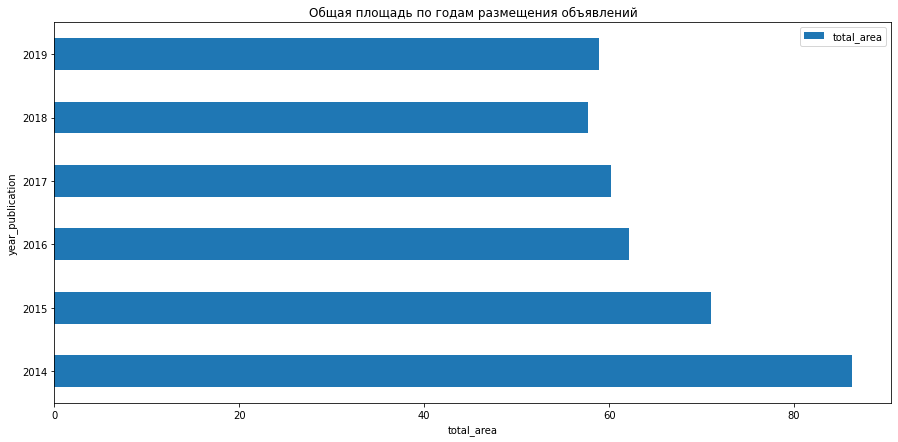

In [162]:
type_floor = data.pivot_table(index='year_publication', values='total_area').plot(
    y='total_area', kind='barh', figsize=(15, 7)
)
plt.title('Общая площадь по годам размещения объявлений')
plt.xlabel('total_area')
plt.ylabel('year_publication')
plt.show()

**Вывод:**<br><br> На цену квартиры напрямую влияет ее площадь: чем больше площадь общая, площадь жилая, тем больше цена. Также напряму, но немного меньше влияет площадь кухни.<br> Зависимость количества комнат от цены прямая только в случаях от 2 до 8, далее коэффициент снижается, влияние уменьшается. <br> Этаж квартиры практически не влияет на цену, исключение - 1 этаж (цена снижается). <br> Дата размещения объявлений о продаже практически никак не влияет на цену продажи квартиры. Если смотреть статистику по годам - в среднем квартиры продавались по более высоким ценам в 2014 году, позже было снижение цены за 1 кв.м. и к 2019 цена начала расти. Общая площадь же продаваемых помещений была максимальной в 2014 году и в последствии снижалась.

#### Средняя цена м2. Статистика по населенным пунктам.

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

In [163]:
# количество объявлений по начеленным пунктам

top10 = data.pivot_table(index = ['locality_name'], values = ['price_square_meter'], aggfunc=('count'))

In [164]:
print(top10)

                      price_square_meter
locality_name                           
Бокситогорск                          16
Волосово                              36
Волхов                               111
Всеволожск                           397
Выборг                               234
...                                  ...
село Путилово                          2
село Рождествено                       3
село Русско-Высоцкое                   9
село Старая Ладога                     2
село Шум                               1

[323 rows x 1 columns]


In [165]:
print('10 населенных пунктов с наибольшим числом объявлений:')
top10 = top10.sort_values(by='price_square_meter', ascending=False).head(10)
display(top10.sort_values(by='price_square_meter', ascending=False).head(10))

10 населенных пунктов с наибольшим числом объявлений:


,price_square_meter
locality_name,
Санкт-Петербург,15582
поселок Мурино,548
поселок Шушары,438
Всеволожск,397
Пушкин,368
Колпино,338
поселок Парголово,327
Гатчина,307
деревня Кудрово,298


In [166]:
top10['metr_price'] = data.pivot_table(index = ['locality_name'], values = ['price_square_meter'], aggfunc=('mean'))

In [167]:
top10_metr = top10[0:10]
display(top10_metr)

,price_square_meter,metr_price
locality_name,,
Санкт-Петербург,15582,114523.617815
поселок Мурино,548,85472.690464
поселок Шушары,438,78577.014984
Всеволожск,397,68719.320400
Пушкин,368,103124.059058
Колпино,338,75424.579098
поселок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,298,92463.898953


In [168]:
# Населенный пункт с самой высокой стоимостью квадратного метра (из топ-10)

top10_max = top10.loc[top10['metr_price'] == top10['metr_price'].max()]
print(top10_max)

                 price_square_meter     metr_price
locality_name                                     
Санкт-Петербург               15582  114523.617815


In [169]:
# Населенный пункт с самой низкой стоимостью квадратного метра (из топ-10)

top10_min = top10.loc[top10['metr_price'] == top10['metr_price'].min()]
print(top10_min)

               price_square_meter    metr_price
locality_name                                  
Выборг                        234  58191.166107


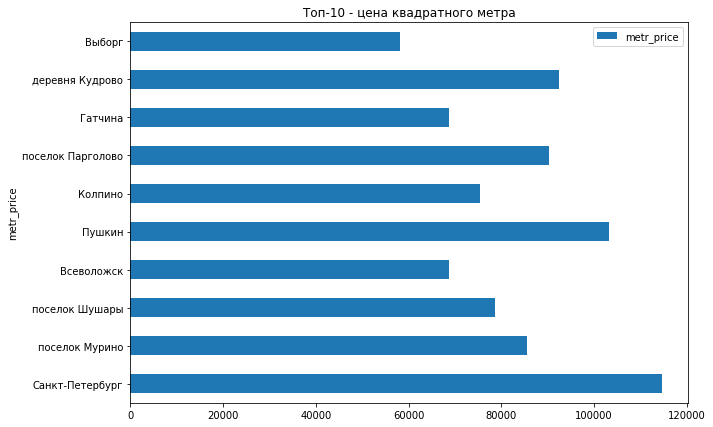

In [170]:
top10_metr.plot(y='metr_price', kind='barh', figsize=(10, 7))
plt.title('Топ-10 - цена квадратного метра')
plt.ylabel('metr_price')
plt.show()

#### Средняя цена расстояния от центра.

In [171]:
#  ранее мы рассчитывали расстояние от центра в км: 
#data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

# выделяем квартиры в Санкт-Петербурге
data_spb = data[lambda x: x['locality_name'] == 'Санкт-Петербург']
display(data_spb)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,year_publication,type_floor,city_centers_nearest_km,type_days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.0,755.0,<NA>,120370.370370,3,3,2019,другой,16.0,без категории
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,2.0,574.0,558,92785.714286,3,8,2015,другой,14.0,долгая
3,0,64900000,159.00,2015-07-24,3,2.60,14,54.00,9,False,...,3.0,234.0,424,408176.100629,4,7,2015,другой,7.0,долгая
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.0,48.0,121,100000.000000,1,6,2018,другой,8.0,нормальная
7,5,7915000,71.60,2019-04-18,2,2.75,24,34.65,22,False,...,0.0,NaN,<NA>,110544.692737,3,4,2019,другой,12.0,без категории
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23555,13,3550000,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,2.0,652.0,29,100566.572238,2,2,2018,другой,16.0,быстрая
23556,3,5500000,52.00,2018-07-19,2,2.60,5,31.00,2,False,...,0.0,NaN,15,105769.230769,3,7,2018,другой,6.0,быстрая
23557,11,9470000,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,1.0,806.0,519,129903.978052,3,10,2016,другой,4.0,долгая
23560,9,9700000,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,3.0,381.0,<NA>,72490.845228,1,3,2017,другой,4.0,без категории


,last_price
city_centers_nearest_km,
0.0,3.144912e+07
1.0,2.096032e+07
2.0,1.768407e+07
3.0,1.077830e+07
4.0,1.193882e+07
5.0,1.395203e+07
6.0,1.480487e+07
7.0,1.455967e+07
8.0,9.243343e+06


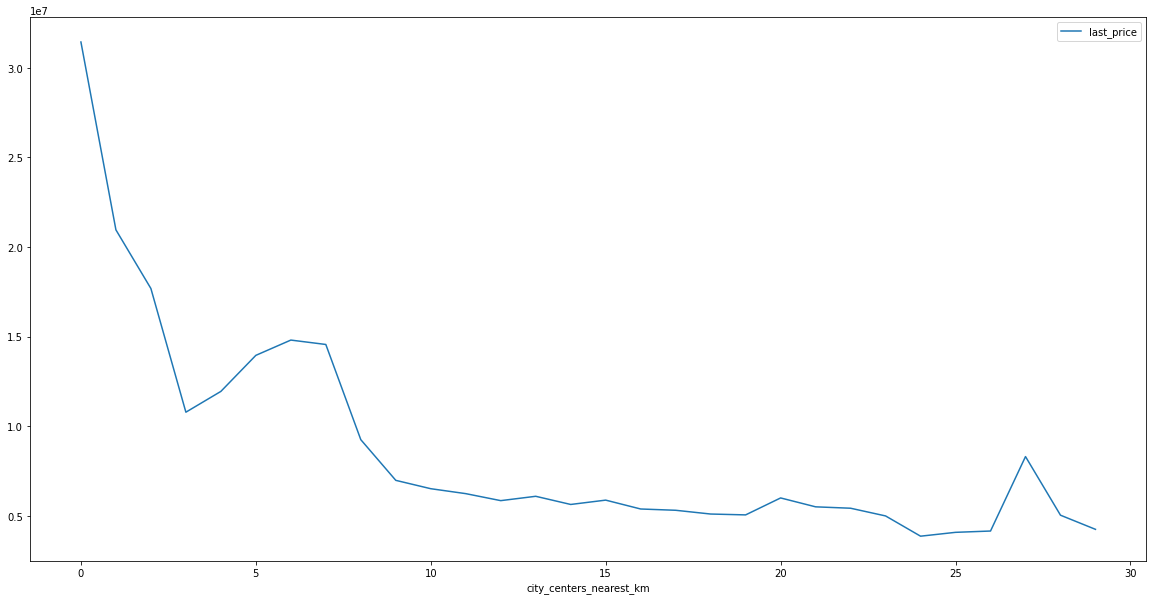

In [172]:
data_spb_price_km = data_spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
data_spb_price_km.plot(y='last_price', kind='line', figsize=(20, 10))
display(data_spb_price_km)

In [173]:
data_spb['city_centers_nearest_km'].corr(data_spb['last_price'])

-0.3020212583422355

Протяжённость города Санкт-Петербург с восток на запад — 25 км, с севера на юг — 52 км, с северо-запада на юго-восток — около 90 км ("География Санкт-Петербурга"). <br> <br> Корреляция отрицательная, следовательно, зависимость обратная: при увеличении удаленности от центра цена на объект падает. <br> <br>Стоимость объектов сильно зависит от удаленности от центра в пределах до 8 км, далее слабое влияние удаленности.<br> Самая высокая цена в центре города (более 31 млн) и она сильно отличается от всех остальных. Далее в пределах от 1 до 8 км цена на объект колеблется от 21 до 10 млн руб. Дальше 8 км - слабое влияние удаленности на цену.

### Общий вывод

In [174]:
data.shape

(23469, 29)

В результате предобработки данных было удалено менее 1% пропущенных данных. Строк было 23699, стало 23469. Количество столбцов увеличено с 22 до 29. Это связано с отсутствием названия в столбце населенного пункта и в количестве этажей в здании. <br><br> Всего населенных пунктов, по которым проводится анализ, после корректировки и заменены неявных дубликатов 323.  <br><br> Пропуски в остальных числовых столбцах удалось заменить медианными значениями. Очень большое колличество пропусков у картографических данных, вероятно это связано с выгрузкой или привязкой к картам. Сменили тип данных в столбцах с датой, ценой объекта, количеством этажей, количеством балконов, количеством дней публикации. Огромное количество пропусков в столбце "апартаменты" заменены на False, так как в нашем распоряжении все-таки архив объявлений о продаже квартир, а не нежилых помещений <br><br> 

При исследовании общей площади объектов видно, что большинство большинство квартир находятся в диапазоне площадей от 25 до 90 кв.м. При этом среднее и медианное значения 60 м2 и 52 м2 соответственно. Квартиры больше 120 м2 редкое явление. Выбросы отрезаны более 120 м2. Медианное значение "популярной" общей площади после отсечения выбросов 50,5 м2, среднее значение 54,8 м2. Межквартильный размах popular_total_area ("популярной" общей площади) содержит основную часть данных общей площади. Т.е. в большинстве случаев общая площадь квартир составляет от 40,0 м2 до 66 м2.

При исследовании жилой площади объектов видно, что основная масса находится в диапазоне от 18,9 до 42 м2. Нижний "ус" диаграммы размаха соответствует минимальному значению 10, верхний ус заканчивается на 72. Это ориентировочные границы нормального размаха. Выбросы отрезаны более 75 м2. Медианное значение "популярной" общей площади 30,0 м2, среднее значение 31,3 м2. Межквартильный размах popular_living_area ("популярной" жилой площади) содержит основную часть данных жилой площади. Т.е. в большинстве случаев жилая площадь квартир составляет от 18,5 м2 до 40 м2.

При исследовании жилой площади объектов видно, что основная масса находится в диапазоне от 7 до 11 м2.
Нижний "ус" диаграммы размаха соответствует минимальному значению 0, верхний ус заканчивается на 17. Значение 0 (ноль) не аномальное. мы заменяли пропуски в площади кухни в квартирах-студиях (число комнат равно 0) на 0 (ноль). Отсечем квартиры с площадью кухни более 20 м2. Это ориентировочные границы нормального размаха. Медианное значение "популярной" площади кухни 9,0 м2, среднее значение 9,8 м2. Межквартильный размах popular_kitchen_area ("популярной" площади кухни) содержит основную часть данных площади. Т.е. в большинстве случаев площадь кухни составляет от 7,0 м2 до 11,1 м2. То есть также, как и до убавления.

**Влияние площади на цену:** Цена на объект напрямую зависит от площади - чем больше площадь квартиры, тем больше цена. Большее влияние оказывает общая плщадь объекта, немного слабее влияет жилая площадь. Еще ниже коэффициент корреляции у площади кухни.

Топ-10 населенных пунктов, где самая высокая цена за вкадратный метр (лидирует Санкт-Петербург):<br><br> 1. Санкт-Петербург <br><br> 2. поселок Мурино <br><br> 3. поселок Шушары <br><br> 4. Всеволожск <br><br> 5. Пушкин <br><br> 6. Колпино <br><br> 7. поселок Парголово <br><br> 8. Гатчина <br><br> 9. деревня Кудрово <br><br> 10. Выборг <br><br> Максимальная средняя цена за квадратный метр в Санкт-Петербурге - 114,5 тыс.руб., минимальная средняя цена в топ-10 за квадратный метр в Выборге - 58 тыс.руб. По количеству объявлений Санкт-Петербург также занимает 1 место (объявлений в 2 раза больше, чем во всех остальных населенных пунктах вместе).

Среднее значение количества комнат совпадает с медианным и равно 2. Мы имеем выбросы в наличии в верхних значениях (они касаются квартир с большой площадью и не относятся к "популярным"). В большинстве случаев количество комнат квартиры равняется 1-3 комнаты (межквартильный размах).

**Влияние количества комнат на цену:** Коэффициент корреляции положительный, но снижается. Цена зависит от количества комнат, но более в случаях, если комнат от 2 до 8, далее коэффициент снижается и влияние ослабевает

При исследовании этажности выявлено следующее. Среднее значение этажа 5,8, медианное равно 4 этаж. Мы имеем выбросы в наличии в верхних значениях (они касаются квартир с большим количеством этажей и не относятся к "популярным"). В большинстве случаев этаж квартиры от 2 до 8 (межквартильный размах). 73% квартир имеют тип этажа "другой": не первый и не последний. Квартир с типом этажа "последний" немного больше, чем с типом этажа "первый". <br> **Влияние этажа квартиры на цену:** Коэффициент корреляции небольшой, положительный. Это говорит о том, что этаж квартиры мало влияет на цену. Исключение - первый этаж, цена значительно ниже, чем у любого другого этажа.

Протяжённость города Санкт-Петербург с восток на запад — 25 км, с севера на юг — 52 км, с северо-запада на юго-восток — около 90 км ("География Санкт-Петербурга").Корреляция отрицательная, следовательно, зависимость обратная: при увеличении удаленности от центра цена на объект падает.<br> **Влияние удаленности квартиры от центра на цену:** Стоимость объектов сильно зависит от удаленности от центра в пределах до 8 км, далее слабое влияние удаленности. Самая высокая цена в центре города (более 31 млн) и она сильно отличается от всех остальных. Далее в пределах от 1 до 8 км цена на объект колеблется от 21 до 10 млн руб. Дальше 8 км - слабое влияние удаленности на цену.

При исследовании даты публикации и количества дней размещения объявлений выявлено следующее. <br> Среднее значение количества дней публикации 181 день, а медиана 95 дней, меньше среднего в два раза. Такое различие говорит о том, что мы имеем множественные выбросы в наличии в верхних значениях (они связаны с тем, что некоторые объявления были опубликованы 3-4 года). В большинстве случаев количество дней находится в диапазоне (межквартильный размах) от 46 дней до 231 дня. Следовательно, мы можем сказать, что быстрые продажи - это продажи от 1 до 45 дней, долгие от 232 до 730, а необычно долгие от 731 до 1580 дней. В категорию "без категории" попали пропущенные значения. <br><br> Самое большое количество объявлений размещается во вторник, среду, четверг, пятницу). Лидеры по количеству объявлений - февраль, март, апрель, ноябрь. В январе и мае размещение объявлений меньше, чем в остальные месяцы, возможно это связано с блительными выходными. <br><br> **Влияние даты объявления на цену:** День недели, месяц и год размещения объявления о продаже квартиры практически не влияет на ее цену. Если смотреть статистику по годам - в среднем квартиры продавались по более высоким ценам в 2014 году, позже было снижение цены за 1 кв.м. и к 2019 цена начала расти. Общая площадь же продаваемых помещений была максимальной в 2014 году и в последствии снижалась.